<a href="https://colab.research.google.com/github/leenamemon/SeniorThesis/blob/main/PrelimAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import os
import re
import matplotlib

In [3]:
annual_returns = {
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

In [4]:
annual_volatility = {
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    'NDX': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SPX': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    "W1DOW": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


In [5]:
annual_cvar = {
 'BDDSESD': [-0.011015783463077947,  -0.019077490405216276,  -0.015390212660872342,  -0.02607519729330544,  -0.03844126679227555,  -0.018559935727274202,  -0.038427318066593476,  -0.018348139173753913],
 'DJIAP': [-0.022069545670314068,  -0.008391584012864618,  -0.02228661065626571,  -0.013960850967090726,  -0.027710782840621784,  -0.021334413090785282,  -0.026373865320180063,  -0.015993036781201238],
 'DJICHK': [-0.024233751584493583,  -0.0141061671441998,  -0.026760684241930635,  -0.021242087076636704,  -0.04188109663914921,  -0.04264259466718505,  -0.05215452551278687,  -0.03212052698441921],
 'DJIMID': [-0.017848926461560742,  -0.0077934304561041445,  -0.021431256542833878,  -0.01657194842440241,  -0.04475702805145595,  -0.017525516894779266,  -0.030790429539090777,  -0.014688000256035724],
 'DSES': [-0.008765002954733758,  -0.009368364410850085,  -0.012712269995979356,  -0.015878113112141018,  -0.03151803524331072,  -0.018049832394562645,  -0.01695239711785901,  -0.005835068997288817],
 'DWDEURS': [-0.027724907760220092,  -0.010748120281788372,  -0.02025715527556499,  -0.017181922616874908,  -0.04561056989379923,  -0.019583117638875682,  -0.035265833044925254,  -0.02137629114458715],
 'GS100': [-0.027844230084068947,  -0.011057481645769661,  -0.02350713862257801,  -0.014782358975253049,  -0.030576842021747024,  -0.02435005370897157,  -0.02792561716748162,  -0.01858259433321334],
 'IMUS': [-0.020464728098673092,  -0.01028690783857102,  -0.028413002453677248,  -0.02105926484486491,  -0.05509672824132366,  -0.02113227369543503,  -0.03748667811582054,  -0.016916714318830982],
 'IMXLD': [-0.0171133382937043,  -0.008369493087102237,  -0.022698462103057943,  -0.016578801587085894,  -0.042639017659664,  -0.015978766471996853,  -0.030467541665330708,  -0.014693908683777466],
 'JKIID': [-0.023374412290117608,  -0.013780341030211474,  -0.029828018026320652,  -0.02122912637500781,  -0.05170863457514112,  -0.022477206603183923,  -0.018984215493369032,  -0.01808820765949326],
 'JPNU': [-0.02912874619823117,  -0.01134822770369869,  -0.024620331044670027,  -0.014102271395768426,  -0.029026381541418643,  -0.023887310407531552,  -0.028230002739854473,  -0.01882636357675912],
 'NDX': [-0.025222088919133082,  -0.0161398469744187,  -0.034626871175541356,  -0.024414439143015707,  -0.05589238254549408,  -0.026912549187111928,  -0.043165255360369935,  -0.02050580020789607],
 'SHX': [-0.019878652222250978,  -0.00980224154065414,  -0.028507322912288278,  -0.020843443036203873,  -0.05559985688302505,  -0.019932224225847967,  -0.03646868663801073,  -0.01652465033652821],
 'SPX': [-0.019709231651556587,  -0.009615109845627617,  -0.02749315281959401,  -0.019588404910887775,  -0.05540419235465825,  -0.01860551559846583,  -0.0334684508746704,  -0.015686913534689487],
 'SWDPACXJ': [-0.0247682097625875,  -0.01410082964438082,  -0.02254304661994093,  -0.018465290283812993,  -0.04509508547540053,  -0.023431232174010937,  -0.03157591459672196,  -0.020570837976157115],
 'SWDPAC': [-0.02875601025257058,  -0.010746708594269943,  -0.024053405090553256,  -0.01644136504707021,  -0.030875851814608467,  -0.02247538667483314,  -0.031204610585519273,  -0.018792539718440235],
 'SWDXUS': [-0.022350476345238072,  -0.008142885649818705,  -0.018882198571479096,  -0.012984424081829453,  -0.03663247441765272,  -0.01858486036315549,  -0.029889387064633288,  -0.01691004803121585],
 'SWPXJAN': [-0.024126437518517754,  -0.013357022793027409,  -0.024041200318761318,  -0.01873881880848057,  -0.038502059007170866,  -0.020518436854002366,  -0.025587332779472807,  -0.015439902764617161],
 'W1DOW': [-0.018361657622350765,  -0.006268964437891898,  -0.018262383024286254,  -0.013362957321285375,  -0.041839600126874016,  -0.01509839040501404,  -0.024968548281068537,  -0.012816702731422193],
 'WALLE': [-0.022589281517318656,  -0.012195516559790513,   -0.021311371525478164,  -0.014990138474881561,  -0.03881175994609173,  -0.01887770909211535,  -0.026446997966173003,  -0.012908301839377643],
 'WORLDS': [-0.018413837123206205,  -0.007017891878892431,  -0.01854879776867552,  -0.015216599575659599,  -0.04397261284843558,  -0.017019499850389027,  -0.02613507597804537,  -0.013334949010582528]
}

In [ ]:
# Load the Excel file
file_path = 'DJIMID_20241021.xlsx'
df = pd.read_excel(file_path)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Ensure the 'Effective date' column is in datetime format with error handling
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

# Drop rows with NaT values in the date column
df.dropna(subset=['Date'], inplace=True)

# Set the date as the index
df.set_index('Date', inplace=True)

# Check if the DataFrame is empty after dropping NaT values
if df.empty:
    print("Warning: The DataFrame is empty after filtering out NaT values. Exiting.")
else:
    # Resample data to get the last entry of each year (annual returns)
    annual_data = df.resample('YE').last()

    # Set start year as the first available January 1
    january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]

    if not january_first_data.empty:
        start_year = january_first_data.index.year.min()
    else:
        print("Warning: No January 1 entries found. Unable to determine start year.")
        start_year = df.index.year.min()  # Fallback to the earliest available year

    # Filter the data to start from January 1 of the first year and end on December 31, 2023
    filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]

    # Check if filtered data is empty before proceeding
    if filtered_data.empty:
        print("Warning: No data available after filtering. Exiting.")
    else:
        # Re-sample the filtered data to get the last value of each year
        annual_data = filtered_data.resample('YE').last()

        # Calculate the annual returns: (ending_value - starting_value) / starting_value
        annual_return = annual_data.pct_change().dropna()

        # Calculate daily returns
        daily_return = filtered_data.pct_change().dropna()

        # Calculate annual volatility (standard deviation of daily returns * sqrt(252))
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Print the results
        print(f"Annual Returns from {start_year} to 2023:\n{annual_return}")
        print(f"Annual Volatility from {start_year} to 2023:\n{annual_volatility}")

In [ ]:
def calculate_returns_and_volatility(file_paths):
    for file_path in file_paths:
        # Load the Excel file
        df = pd.read_excel(file_path)

        # Try to identify the date column automatically
        date_column = None
        for col in df.columns:
            if 'date' in col.lower():  # Look for any column with 'date' in its name (case-insensitive)
                date_column = col
                break
        if date_column is None:
            # Fall back to using the first column if no column with 'date' in the name is found
            date_column = df.columns[0]

        # Convert the identified date column to datetime format with error handling
        df[date_column] = pd.to_datetime(df[date_column], format='%m/%d/%Y', errors='coerce')

        # Check for NaT values that may indicate parsing issues
        if df[date_column].isna().any():
            print(f"Warning: There are NaT values in the date column of {file_path}.")
            print(df[df[date_column].isna()])  # Print rows with NaT

        # Set the identified date column as the index
        df.set_index(date_column, inplace=True)

        # Set start year as the first available January 1
        january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]
        start_year = january_first_data.index.year.min()

        # Filter the data to start from January 1 of the first year and end on December 31, 2023
        filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]

        # Re-sample the filtered data to get the last value of each year
        annual_data = filtered_data.resample('YE').last()

        # Calculate the annual returns: (ending_value - starting_value) / starting_value
        annual_return = annual_data.pct_change().dropna()

        # Calculate daily returns
        daily_return = filtered_data.pct_change().dropna()

        # Calculate annual volatility (standard deviation of daily returns * sqrt(252))
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Print the results for each file
        file_name = os.path.basename(file_path)
        print(f"Results for {file_name}:")
        print(f"Annual Returns from {start_year} to 2023:\n{annual_return}")
        print(f"Annual Volatility from {start_year} to 2023:\n{annual_volatility}")
        print("-" * 50)

In [ ]:
# Mount Google Drive (if needed)
from google.colab import drive
drive.mount('/content/drive')

# Specify the folder path
folder_path = '/content/drive/My Drive/Thesis/Indices'

# List all files in the folder
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.xlsx')]

# Print file paths
print("File paths:", file_paths)

Mounted at /content/drive
File paths: ['/content/drive/My Drive/Thesis/Indices/DJIMID_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/SHX_20211021.xlsx', '/content/drive/My Drive/Thesis/Indices/IMUS_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/IMXLD_20241021.xlsx', '/content/drive/My Drive/Thesis/Indices/JPNU_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/WALLE_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/BDDSESD_20241209.xlsx', '/content/drive/My Drive/Thesis/Indices/GS100_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/WORLDS_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/SWDPAC_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/SWDPACXJ_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/SWDXUS_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/SWPXJAN_20241206.xlsx', '/content/drive/My Drive/Thesis/Indices/NDX_20241202.xlsx', '/content/drive/My Drive/Thesis/Indices/SPX_20241022.xlsx', '/content/drive/My Drive/The

In [ ]:
# annual_returns, annual_volatility = calculate_returns_and_volatility(file_paths)

In [ ]:
def calculate_returns_and_volatility(file_paths):
    # Initialize dictionaries
    annual_returns_data = {"Year": [], "Files": {}}
    annual_volatility_data = {"Year": [], "Files": {}}

    for file_path in file_paths:
        print(f"Processing file: {file_path}")  # Debug

        # Load the Excel file
        df = pd.read_excel(file_path)

        # Identify the date column
        date_column = next((col for col in df.columns if 'date' in col.lower()), df.columns[0])
        df[date_column] = pd.to_datetime(df[date_column], format='%m/%d/%Y', errors='coerce')

        # Handle invalid dates
        if df[date_column].isna().any():
            print(f"Warning: Invalid dates found in file {file_path}. Skipping rows with NaT...")
            df.dropna(subset=[date_column], inplace=True)

        # Set date column as index
        df.set_index(date_column, inplace=True)

        # Determine the start year
        january_first_data = df[(df.index.month == 1) & (df.index.day == 1)]
        start_year = january_first_data.index.year.min()
        if start_year is None or pd.isna(start_year):
            print(f"Warning: No valid start year found for file {file_path}. Skipping...")
            continue

        print(f"Start year: {start_year}")  # Debug

        # Filter data and resample
        filtered_data = df[(df.index >= pd.Timestamp(f'{start_year}-01-01')) & (df.index <= pd.Timestamp('2023-12-31'))]
        annual_data = filtered_data.resample('YE').last()
        annual_return = annual_data.pct_change().dropna()
        daily_return = filtered_data.pct_change().dropna()
        annual_volatility = daily_return.groupby(daily_return.index.year).std() * np.sqrt(252)

        # Collect results
        file_name = os.path.basename(file_path).split('.')[0]
        annual_returns_data["Year"] = list(annual_return.index.year)
        annual_returns_data["Files"][file_name] = list(annual_return.values.flatten())
        annual_volatility_data["Year"] = list(annual_volatility.index)
        annual_volatility_data["Files"][file_name] = list(annual_volatility.values.flatten())

    print("Annual Returns Data:", annual_returns_data)
    print("\nAnnual Volatility Data:", annual_volatility_data)
    return annual_returns_data, annual_volatility_data

In [ ]:
def calculate_returns_and_risk_metrics(file_paths, confidence_level=0.95):
    results = []

    for file_path in file_paths:
        # Load the Excel file
        df = pd.read_excel(file_path)

        # Identify the date column
        date_column = None
        for col in df.columns:
            if 'date' in col.lower():  # Look for any column with 'date' in its name (case-insensitive)
                date_column = col
                break
        if date_column is None:
            # Fall back to using the first column if no column with 'date' in the name is found
            date_column = df.columns[0]

        # Convert the identified date column to datetime format
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

        # Drop rows with NaT in the date column
        df = df.dropna(subset=[date_column])

        # Set the identified date column as the index
        df.set_index(date_column, inplace=True)

        # Filter data to focus on 2016-2024
        df = df[(df.index >= '2016-01-01') & (df.index <= '2024-12-31')]

        # Calculate daily returns
        daily_return = df[df.columns[0]].pct_change().dropna()

        # Calculate VaR and C-VaR for each year
        yearly_results = {}
        for year in range(2016, 2024):
            yearly_data = daily_return[daily_return.index.year == year]
            if not yearly_data.empty:
                var = np.percentile(yearly_data, (1 - confidence_level) * 100)
                cvar = yearly_data[yearly_data <= var].mean()
                yearly_results[year] = {"VaR": var, "C-VaR": cvar}

        # Store results for each file
        file_name = os.path.basename(file_path)
        results.append({
            "file": file_name,
            "yearly_results": yearly_results
        })

        # Print the file name and yearly VaR and C-VaR
        print(f"File: {file_name}")
        for year, metrics in yearly_results.items():
            print(f"Year {year}: VaR = {metrics['VaR']:.6f}, C-VaR = {metrics['C-VaR']:.6f}")
        print("-" * 50)

    return results

In [ ]:
file_paths = ['BDDSESD_20241209.xlsx', 'DJIAP_20241206.xlsx', 'DJICHK_20241206.xlsx', 'DJIMID_20241021.xlsx' , 'DSES_20241206.xlsx', 'DSES_20241206.xlsx', 'DWDEURS_20241206.xlsx', 'GS100_20241206.xlsx', 'IMUS_20241021.xlsx', 'IMXLD_20241021.xlsx', 'JKIID_20241206.xlsx', 'JPNU_20241206.xlsx',
              'NDX_20241202.xlsx' , 'SHX_20211021.xlsx', 'SPX_20241022.xlsx', 'SWDPACXJ_20241206.xlsx', 'SWDPAC_20241206.xlsx', 'SWDXUS_20241206.xlsx', 'SWPXJAN_20241206.xlsx', 'W1DOW_20241021.xlsx', 'WALLE_20241206.xlsx', 'WORLDS_20241206.xlsx']
results = calculate_returns_and_risk_metrics(file_paths)

In [ ]:
def extract_var_and_cvar(data):
    var_array = []
    cvar_array = []

    for item in data:
        # Extract the index name from the filename
        filename = item.get('file', '')
        match = re.search(r"(\w+)_", filename)
        if match:
            index_name = match.group(1)
        else:
            continue

        # Extract yearly results
        yearly_results = item.get('yearly_results', {})
        for year, metrics in yearly_results.items():
            if 2016 <= year <= 2023:  # Restrict to years 2016–2023
                var = metrics.get('VaR')
                cvar = metrics.get('C-VaR')
                if var is not None:
                    var_array.append((index_name, var))
                if cvar is not None:
                    cvar_array.append((index_name, cvar))

    return var_array, cvar_array

In [ ]:
data = results

# Extract the arrays
var_array, cvar_array = extract_var_and_cvar(data)

# Print results
print("VaR Array:")
print(var_array)
print("\nC-VaR Array:")
print(cvar_array)

VaR Array:
[('BDDSESD', -0.007893487467607018), ('BDDSESD', -0.013261311390337203), ('BDDSESD', -0.012521055231728443), ('BDDSESD', -0.015681758430725567), ('BDDSESD', -0.01384183481327292), ('BDDSESD', -0.015196990187352743), ('BDDSESD', -0.021435828499966836), ('BDDSESD', -0.010380205437203204), ('DJIAP', -0.01562275082810936), ('DJIAP', -0.006712234731868114), ('DJIAP', -0.016047048020900505), ('DJIAP', -0.010169664498022691), ('DJIAP', -0.019993839959269535), ('DJIAP', -0.014824965343616102), ('DJIAP', -0.02123709023011912), ('DJIAP', -0.012528811947149103), ('DJICHK', -0.017786868529946185), ('DJICHK', -0.009718509050823292), ('DJICHK', -0.020618214595753272), ('DJICHK', -0.016644378650608353), ('DJICHK', -0.03033217037176918), ('DJICHK', -0.028755425123078826), ('DJICHK', -0.04011699322343138), ('DJICHK', -0.028475033209034415), ('DJIMID', -0.011379504263536034), ('DJIMID', -0.00496237283540527), ('DJIMID', -0.016247455928597217), ('DJIMID', -0.00999486803182714), ('DJIMID', -0.0

In [ ]:
print("Data Type:", type(data))
if isinstance(data, list):
    print("List Item Types:", [type(item) for item in data])
    print("Example Items:", data[:3])  # Print the first three items for inspection


Data Type: <class 'list'>
List Item Types: [<class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>, <class 'dict'>]
Example Items: [{'file': 'BDDSESD_20241209.xlsx', 'yearly_results': {2016: {'VaR': -0.007893487467607018, 'C-VaR': -0.011015783463077947}, 2017: {'VaR': -0.013261311390337203, 'C-VaR': -0.019077490405216276}, 2018: {'VaR': -0.012521055231728443, 'C-VaR': -0.015390212660872342}, 2019: {'VaR': -0.015681758430725567, 'C-VaR': -0.02607519729330544}, 2020: {'VaR': -0.01384183481327292, 'C-VaR': -0.03844126679227555}, 2021: {'VaR': -0.015196990187352743, 'C-VaR': -0.018559935727274202}, 2022: {'VaR': -0.021435828499966836, 'C-VaR': -0.038427318066593476}, 2023: {'VaR': -0.010380205437203204, 'C-VaR': -0

In [ ]:
def create_annual_var(data):
    # Initialize the structure for annual VaR
    annual_VaR = {"Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]}

    for item in data:
        # Extract the index name from the filename
        filename = item.get('file', '')
        match = re.search(r"(\w+)_", filename)
        if match:
            index_name = match.group(1)
        else:
            continue

        # Extract yearly results
        yearly_results = item.get('yearly_results', {})
        var_values = []

        # Collect VaR values for the years 2016-2023
        for year in range(2016, 2024):
            metrics = yearly_results.get(year, {})
            var = metrics.get('VaR')
            if var is not None:
                var_values.append(var)

        # Check if there are any valid VaR values
        if var_values:
            annual_VaR[index_name] = var_values


    return annual_VaR
    # Output the result
    print("annual_VaR:", annual_VaR)

In [ ]:
def create_annual_cvar(data):
    # Initialize the structure for annual VaR
    annual_CVaR = {"Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]}

    for item in data:
        # Extract the index name from the filename
        filename = item.get('file', '')
        match = re.search(r"(\w+)_", filename)
        if match:
            index_name = match.group(1)
        else:
            continue

        # Extract yearly results
        yearly_results = item.get('yearly_results', {})
        cvar_values = []

        # Collect VaR values for the years 2016-2023
        for year in range(2016, 2024):
            metrics = yearly_results.get(year, {})
            cvar = metrics.get('C-VaR')
            if cvar is not None:
                cvar_values.append(cvar)

        # Check if there are any valid VaR values
        if cvar_values:
            annual_CVaR[index_name] = cvar_values

    return annual_CVaR
    # Output the result
    print("annual_CVar", annaual_CVaR)

In [ ]:
annual_VaR = create_annual_var(results)

In [ ]:
annual_CVaR = create_annual_cvar(results)

In [ ]:
annual_VaR = {
  'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
 'BDDSESD': [-0.007893487467607018,
  -0.013261311390337203,
  -0.012521055231728443,
  -0.015681758430725567,
  -0.01384183481327292,
  -0.015196990187352743,
  -0.021435828499966836,
  -0.010380205437203204],
 'DJIAP': [-0.01562275082810936,
  -0.006712234731868114,
  -0.016047048020900505,
  -0.010169664498022691,
  -0.019993839959269535,
  -0.014824965343616102,
  -0.02123709023011912,
  -0.012528811947149103],
 'DJICHK': [-0.017786868529946185,
  -0.009718509050823292,
  -0.020618214595753272,
  -0.016644378650608353,
  -0.03033217037176918,
  -0.028755425123078826,
  -0.04011699322343138,
  -0.028475033209034415],
 'DJIMID': [-0.011379504263536034,
  -0.00496237283540527,
  -0.016247455928597217,
  -0.00999486803182714,
  -0.024513484735011037,
  -0.013664476618385652,
  -0.02435459272941999,
  -0.012373641286034033],
 'DSES': [-0.00690451484173778,
  -0.007197110006386307,
  -0.0106771498215306,
  -0.012878144368858537,
  -0.015153737518862922,
  -0.014793469299698598,
  -0.01225190948067799,
  -0.00471764524501501],
 'DWDEURS': [-0.016907343801552385,
  -0.008539770233914636,
  -0.016791976764599124,
  -0.012166757780412376,
  -0.028575216002271083,
  -0.0161258204483664,
  -0.025283605829443025,
  -0.016479384089823978],
 'GS100': [-0.019418323336333063,
  -0.007529984884969332,
  -0.016929760596001483,
  -0.009827571968798429,
  -0.021637789382909913,
  -0.016056251993980666,
  -0.02152169784043175,
  -0.015986572108564],
 'IMUS': [-0.013494841154553638,
  -0.005687956675438152,
  -0.022124415486252158,
  -0.012070205280725717,
  -0.03385900342763414,
  -0.01710742355904633,
  -0.03154860633749528,
  -0.014822926282701708],
 'IMXLD': [-0.010579830634942698,
  -0.005420983979062914,
  -0.01644070127314079,
  -0.010447577153597676,
  -0.023471438123872056,
  -0.011723698074833309,
  -0.023080635658434965,
  -0.011549034735226161],
 'JKIID': [-0.018689503399253238,
  -0.010888155229775518,
  -0.02301813776525523,
  -0.017538314500303732,
  -0.03589718171895728,
  -0.018895910166060247,
  -0.014053369386588181,
  -0.013425995169763569],
 'JPNU': [-0.019934994324087713,
  -0.008441526921734941,
  -0.01737058800567951,
  -0.011034887226305277,
  -0.01912288085806111,
  -0.01721796378317284,
  -0.022653268913071473,
  -0.015619400220187152],
 'NDX': [-0.015463186089285477,
  -0.008694052187953712,
  -0.02527085847827964,
  -0.01589878152076285,
  -0.03895266200767375,
  -0.020912910948351952,
  -0.034752567554814075,
  -0.017957043812095307],
 'SHX': [-0.013294970732359634,
  -0.0053806655743808786,
  -0.021978307010360847,
  -0.011949107332013858,
  -0.033687867020697704,
  -0.014581753120784774,
  -0.030227324180856822,
  -0.014240909924244302],
 'SPX': [-0.01245044229611475,
  -0.005354427321664686,
  -0.020680891613706617,
  -0.012035448656522243,
  -0.033583083215250914,
  -0.01309245853797722,
  -0.026370957873189743,
  -0.013768621991906899],
 'SWDPACXJ': [-0.01793614429976182,
  -0.00995111910808721,
  -0.01738802705807439,
  -0.014481073919267584,
  -0.026069327991553527,
  -0.01614293694108104,
  -0.02379169792613059,
  -0.017176235470917043],
 'SWDPAC': [-0.01914756310969123,
  -0.008002374501893337,
  -0.01609091103912974,
  -0.011685162303645089,
  -0.0200550549302214,
  -0.016015245800349857,
  -0.020253086526428512,
  -0.01562811660130584],
 'SWDXUS': [-0.015096055641930183,
  -0.006387896002730153,
  -0.014650783867064174,
  -0.009565730178620876,
  -0.024201307337000235,
  -0.01291455379819092,
  -0.020445352939933725,
  -0.012780634353700557],
 'SWPXJAN': [-0.014981151466019027,
  -0.009232516228047074,
  -0.016654365865834585,
  -0.013882731770341704,
  -0.023510140953108064,
  -0.015201433831512874,
  -0.01866180336857292,
  -0.011781816125370957],
 'W1DOW': [-0.011250138277502124,
  -0.004158000594989541,
  -0.013267377075470961,
  -0.008178920279778347,
  -0.022025555579203916,
  -0.009295120962383628,
  -0.017384531750827208,
  -0.010262787367400399],
 'WALLE': [-0.015503057100132707,
  -0.008718460671194023,
  -0.016051521290310698,
  -0.010344327010949386,
  -0.0186359670075455,
  -0.013923007704245009,
  -0.0180080934877143,
  -0.010368867337404098],
 'WORLDS': [-0.012085525033437355,
  -0.005169711984864483,
  -0.014155044548254158,
  -0.010378851571092374,
  -0.023028102928882386,
  -0.010382161593737473,
  -0.019793805158014363,
  -0.010801228523945869]
}

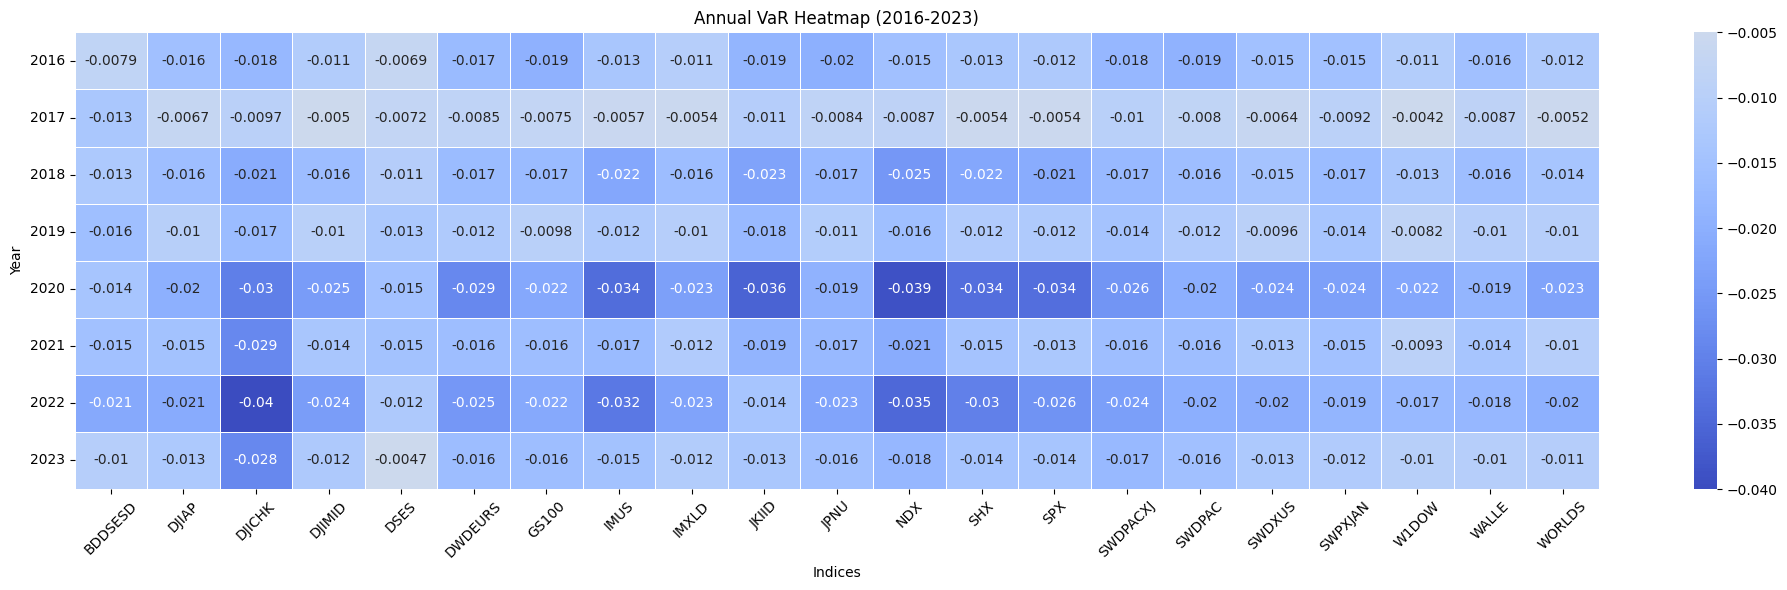

In [ ]:
annual_returns_df = pd.DataFrame(annual_VaR)

# Set the Year as the index for better plotting
annual_returns_df.set_index("Year", inplace=True)

# Plotting the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(annual_returns_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5, vmin=-0.04, vmax=-0.005)
plt.title('Annual VaR Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

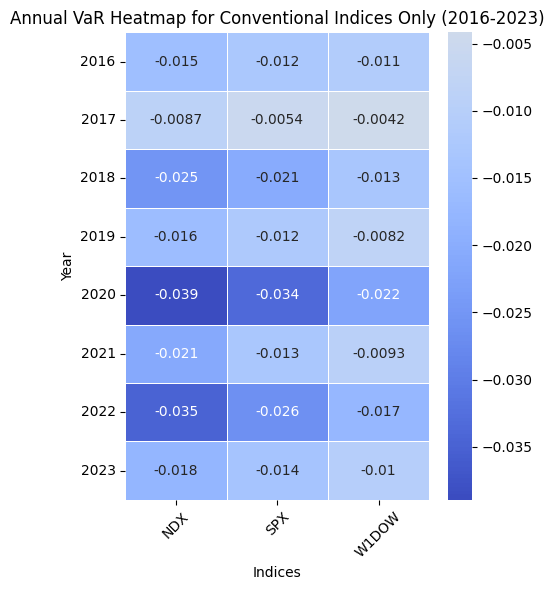

In [ ]:
# Filter the DataFrame to include only the specified indices
filtered_annual_returns_df = annual_returns_df[['NDX', 'SPX', 'W1DOW']]

# Plotting the heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(filtered_annual_returns_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Annual VaR Heatmap for Conventional Indices Only (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
annual_CVaR = {'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
 'BDDSESD': [-0.011015783463077947,
  -0.019077490405216276,
  -0.015390212660872342,
  -0.02607519729330544,
  -0.03844126679227555,
  -0.018559935727274202,
  -0.038427318066593476,
  -0.018348139173753913],
 'DJIAP': [-0.022069545670314068,
  -0.008391584012864618,
  -0.02228661065626571,
  -0.013960850967090726,
  -0.027710782840621784,
  -0.021334413090785282,
  -0.026373865320180063,
  -0.015993036781201238],
 'DJICHK': [-0.024233751584493583,
  -0.0141061671441998,
  -0.026760684241930635,
  -0.021242087076636704,
  -0.04188109663914921,
  -0.04264259466718505,
  -0.05215452551278687,
  -0.03212052698441921],
 'DJIMID': [-0.017848926461560742,
  -0.0077934304561041445,
  -0.021431256542833878,
  -0.01657194842440241,
  -0.04475702805145595,
  -0.017525516894779266,
  -0.030790429539090777,
  -0.014688000256035724],
 'DSES': [-0.008765002954733758,
  -0.009368364410850085,
  -0.012712269995979356,
  -0.015878113112141018,
  -0.03151803524331072,
  -0.018049832394562645,
  -0.01695239711785901,
  -0.005835068997288817],
 'DWDEURS': [-0.027724907760220092,
  -0.010748120281788372,
  -0.02025715527556499,
  -0.017181922616874908,
  -0.04561056989379923,
  -0.019583117638875682,
  -0.035265833044925254,
  -0.02137629114458715],
 'GS100': [-0.027844230084068947,
  -0.011057481645769661,
  -0.02350713862257801,
  -0.014782358975253049,
  -0.030576842021747024,
  -0.02435005370897157,
  -0.02792561716748162,
  -0.01858259433321334],
 'IMUS': [-0.020464728098673092,
  -0.01028690783857102,
  -0.028413002453677248,
  -0.02105926484486491,
  -0.05509672824132366,
  -0.02113227369543503,
  -0.03748667811582054,
  -0.016916714318830982],
 'IMXLD': [-0.0171133382937043,
  -0.008369493087102237,
  -0.022698462103057943,
  -0.016578801587085894,
  -0.042639017659664,
  -0.015978766471996853,
  -0.030467541665330708,
  -0.014693908683777466],
 'JKIID': [-0.023374412290117608,
  -0.013780341030211474,
  -0.029828018026320652,
  -0.02122912637500781,
  -0.05170863457514112,
  -0.022477206603183923,
  -0.018984215493369032,
  -0.01808820765949326],
 'JPNU': [-0.02912874619823117,
  -0.01134822770369869,
  -0.024620331044670027,
  -0.014102271395768426,
  -0.029026381541418643,
  -0.023887310407531552,
  -0.028230002739854473,
  -0.01882636357675912],
 'NDX': [-0.025222088919133082,
  -0.0161398469744187,
  -0.034626871175541356,
  -0.024414439143015707,
  -0.05589238254549408,
  -0.026912549187111928,
  -0.043165255360369935,
  -0.02050580020789607],
 'SHX': [-0.019878652222250978,
  -0.00980224154065414,
  -0.028507322912288278,
  -0.020843443036203873,
  -0.05559985688302505,
  -0.019932224225847967,
  -0.03646868663801073,
  -0.01652465033652821],
 'SPX': [-0.019709231651556587,
  -0.009615109845627617,
  -0.02749315281959401,
  -0.019588404910887775,
  -0.05540419235465825,
  -0.01860551559846583,
  -0.0334684508746704,
  -0.015686913534689487],
 'SWDPACXJ': [-0.0247682097625875,
  -0.01410082964438082,
  -0.02254304661994093,
  -0.018465290283812993,
  -0.04509508547540053,
  -0.023431232174010937,
  -0.03157591459672196,
  -0.020570837976157115],
 'SWDPAC': [-0.02875601025257058,
  -0.010746708594269943,
  -0.024053405090553256,
  -0.01644136504707021,
  -0.030875851814608467,
  -0.02247538667483314,
  -0.031204610585519273,
  -0.018792539718440235],
 'SWDXUS': [-0.022350476345238072,
  -0.008142885649818705,
  -0.018882198571479096,
  -0.012984424081829453,
  -0.03663247441765272,
  -0.01858486036315549,
  -0.029889387064633288,
  -0.01691004803121585],
 'SWPXJAN': [-0.024126437518517754,
  -0.013357022793027409,
  -0.024041200318761318,
  -0.01873881880848057,
  -0.038502059007170866,
  -0.020518436854002366,
  -0.025587332779472807,
  -0.015439902764617161],
 'W1DOW': [-0.018361657622350765,
  -0.006268964437891898,
  -0.018262383024286254,
  -0.013362957321285375,
  -0.041839600126874016,
  -0.01509839040501404,
  -0.024968548281068537,
  -0.012816702731422193],
 'WALLE': [-0.022589281517318656,
  -0.012195516559790513,
  -0.021311371525478164,
  -0.014990138474881561,
  -0.03881175994609173,
  -0.01887770909211535,
  -0.026446997966173003,
  -0.012908301839377643],
 'WORLDS': [-0.018413837123206205,
  -0.007017891878892431,
  -0.01854879776867552,
  -0.015216599575659599,
  -0.04397261284843558,
  -0.017019499850389027,
  -0.02613507597804537,
  -0.013334949010582528]
}

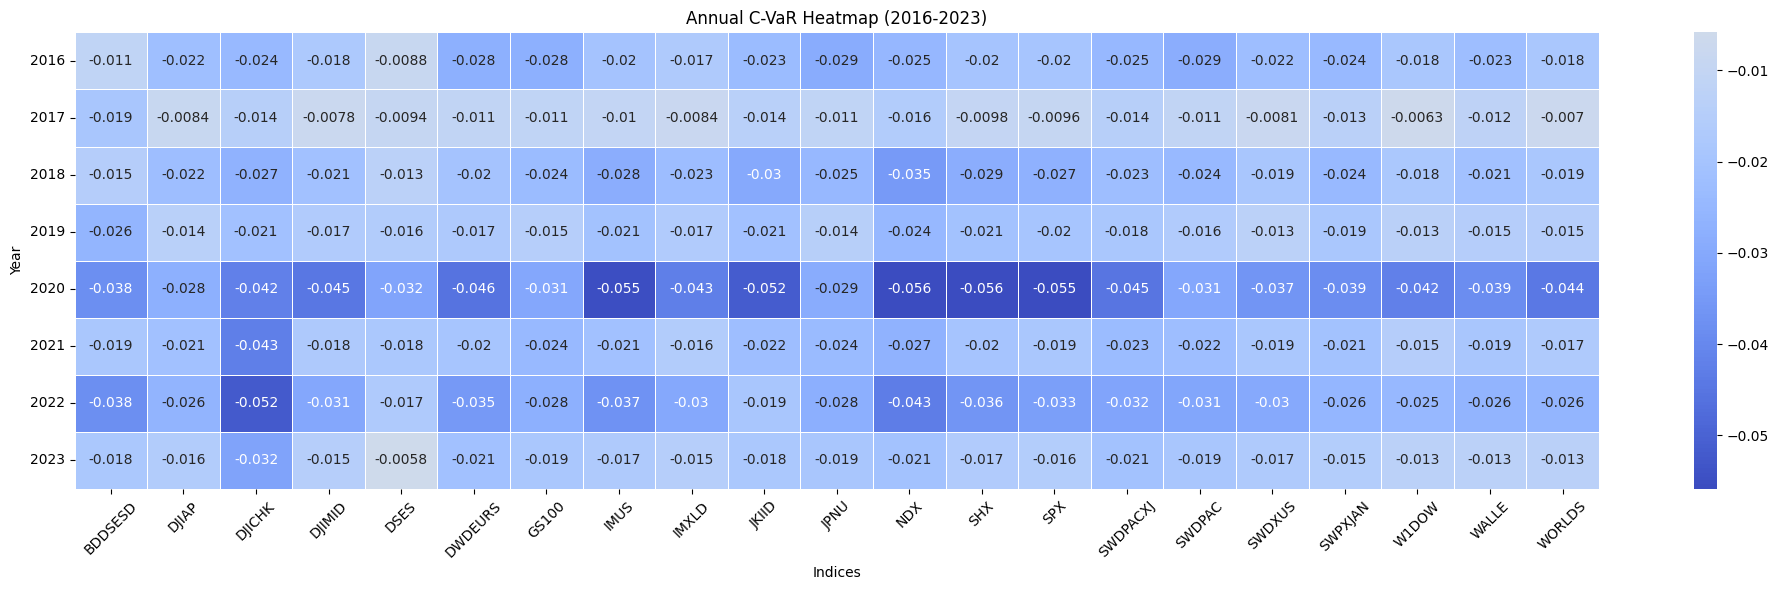

In [ ]:
annual_returns_c_df = pd.DataFrame(annual_CVaR)

# Set the Year as the index for better plotting
annual_returns_c_df.set_index("Year", inplace=True)

# Plotting the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(annual_returns_c_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Annual C-VaR Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

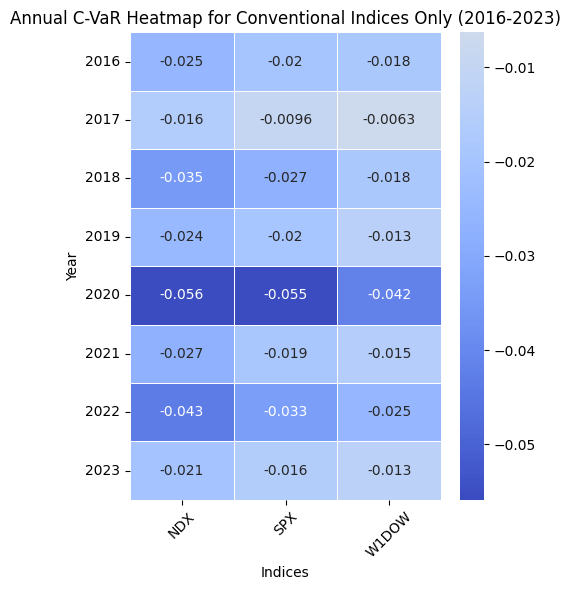

In [ ]:
# Filter the DataFrame to include only the specified indices
filtered_annual_returns_c_df = annual_returns_c_df[['NDX', 'SPX', 'W1DOW']]

# Plotting the heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(filtered_annual_returns_c_df, annot=True, cmap="coolwarm", center=0, linewidths=0.5)
plt.title('Annual C-VaR Heatmap for Conventional Indices Only (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX (Conv.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

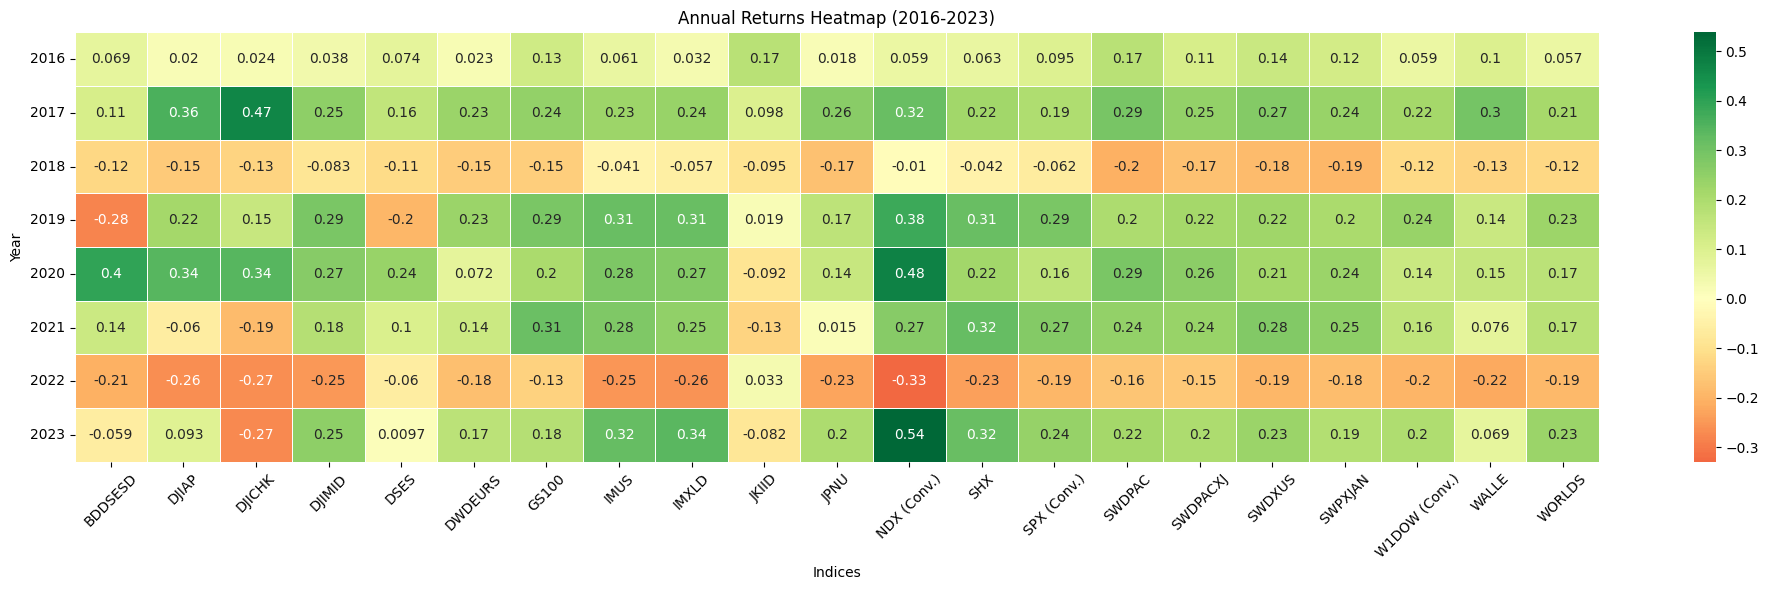

In [ ]:
annual_returns_df = pd.DataFrame(annual_returns_data)

# Set the Year as the index for better plotting
annual_returns_df.set_index("Year", inplace=True)

# Plotting the heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(annual_returns_df, annot=True, cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Annual Returns Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

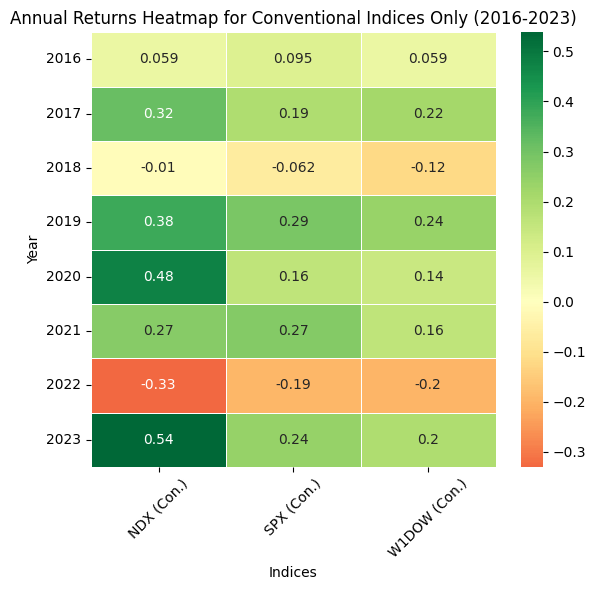

In [ ]:
# Define the data
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SPX (Conv.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
}

# Create the DataFrame
annual_returns_df = pd.DataFrame(annual_returns_data)

# Filter to include only the specified indices
filtered_annual_returns_df = annual_returns_df[['Year', 'NDX (Conv.)', 'SPX (Conv.)', 'W1DOW (Conv.)']]

# Set the Year as the index for better plotting
filtered_annual_returns_df.set_index("Year", inplace=True)

# Plotting the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(filtered_annual_returns_df, annot=True, cmap='RdYlGn', center=0, linewidths=0.5)
plt.title('Annual Returns Heatmap for Conventional Indices Only (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
annual_volatility_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    'NDX (Conv.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SPX (Conv.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    "W1DOW (Conv.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


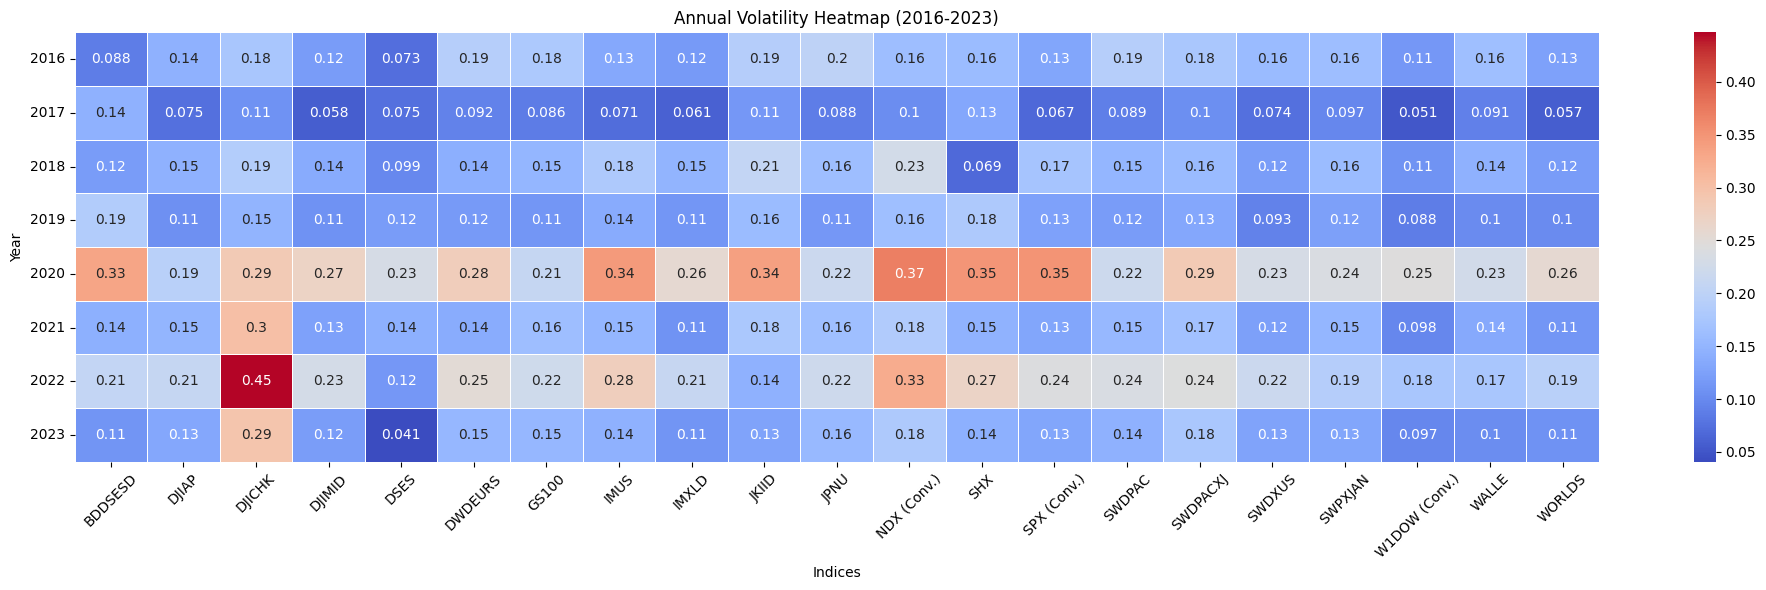

In [ ]:
annual_volatility_df = pd.DataFrame(annual_volatility_data)

# Set the Year as the index for better plotting
annual_volatility_df.set_index("Year", inplace=True)

# Plotting the heatmap with a green-to-red colorscale
plt.figure(figsize=(20, 6))
sns.heatmap(annual_volatility_df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Annual Volatility Heatmap (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

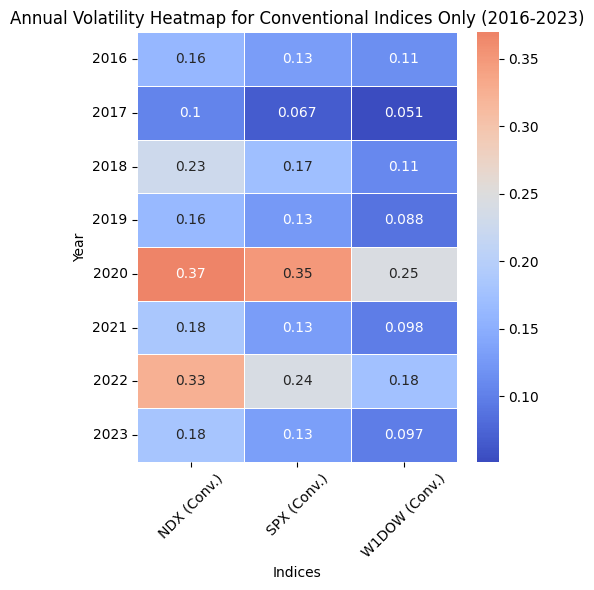

In [ ]:
# Filter the DataFrame to include only the specified indices
filtered_annual_vol = annual_volatility_df[['NDX (Conv.)', 'SPX (Conv.)', 'W1DOW (Conv.)']]

# Plotting the heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(filtered_annual_vol, annot=True, cmap="coolwarm", center=0.25, linewidths=0.5)
plt.title('Annual Volatility Heatmap for Conventional Indices Only (2016-2023)')
plt.xlabel('Indices')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

# **Optimization - Mean-Variance Model**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
import re

In [ ]:
# Objective function: maximize portfolio return
def portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# Portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [ ]:
def test_Rstar(R_star):

  # Number of assets
  n_assets = len(mean_returns)

  # Constraints
  constraints = [
      {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights sum to 1
      {"type": "ineq", "fun": lambda w: R_star - portfolio_risk(w)},  # Risk constraint
  ]

  # Bounds for weights (no short selling)
  bounds = [(0, 1) for _ in range(n_assets)]

  # Initial guess
  init_guess = np.array([1 / n_assets] * n_assets)

  # Optimization
  result = minimize(
      portfolio_return,  # Minimize the negative return
      init_guess,
      method="SLSQP",
      bounds=bounds,
      constraints=constraints,
  )

  # Optimal weights
  optimal_weights = result.x
  optimal_return = -result.fun
  optimal_risk = portfolio_risk(optimal_weights)

  # print("Optimal Weights:", optimal_weights)
  # print("Expected Return:", optimal_return)
  # print("Portfolio Risk:", optimal_risk)

  return optimal_weights

In [ ]:
# Convert data to DataFrames
returns_df = pd.DataFrame(annual_returns_data).set_index("Year")
volatility_df = pd.DataFrame(annual_volatility_data).set_index("Year")

# Calculate average returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

In [ ]:
R_stars = np.linspace(0, 0.3, 61)
print(R_stars)

[0.    0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055
 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115
 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175
 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225 0.23  0.235
 0.24  0.245 0.25  0.255 0.26  0.265 0.27  0.275 0.28  0.285 0.29  0.295
 0.3  ]


In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "DJIMID": [0.038071, 0.251854, -0.083622, 0.289595, 0.266774, 0.184870, -0.251276, 0.255713],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
}

annual_volatility_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "DJIMID": [0.108120, 0.052541, 0.123993, 0.098559, 0.246109, 0.111318, 0.203516, 0.107602],
    "IMUS": [0.209707, 0.195465, 0.287545, 0.258017, 0.270002, 0.169759, 0.120990, 0.144815],
    "IMXLD": [0.235246, 0.139348, 0.091388, 0.082021, 0.094515, 0.128796, 0.315342, 0.110916],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
}

In [ ]:
islamic_indices_USA = ["DJIMID", "IMUS", "IMXLD", "SHX"]

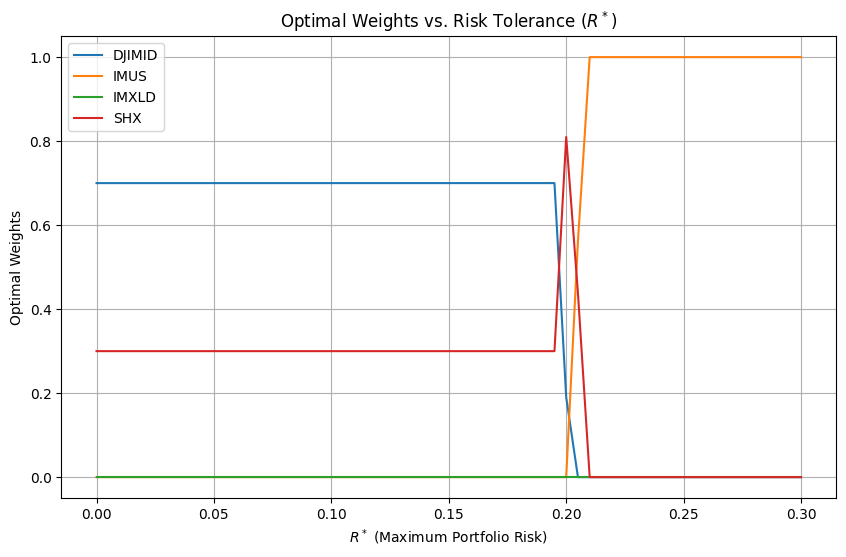

In [ ]:
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices_USA[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
R_stars = np.linspace(0.195, 0.2125, 176)
print(R_stars)

[0.195  0.1951 0.1952 0.1953 0.1954 0.1955 0.1956 0.1957 0.1958 0.1959
 0.196  0.1961 0.1962 0.1963 0.1964 0.1965 0.1966 0.1967 0.1968 0.1969
 0.197  0.1971 0.1972 0.1973 0.1974 0.1975 0.1976 0.1977 0.1978 0.1979
 0.198  0.1981 0.1982 0.1983 0.1984 0.1985 0.1986 0.1987 0.1988 0.1989
 0.199  0.1991 0.1992 0.1993 0.1994 0.1995 0.1996 0.1997 0.1998 0.1999
 0.2    0.2001 0.2002 0.2003 0.2004 0.2005 0.2006 0.2007 0.2008 0.2009
 0.201  0.2011 0.2012 0.2013 0.2014 0.2015 0.2016 0.2017 0.2018 0.2019
 0.202  0.2021 0.2022 0.2023 0.2024 0.2025 0.2026 0.2027 0.2028 0.2029
 0.203  0.2031 0.2032 0.2033 0.2034 0.2035 0.2036 0.2037 0.2038 0.2039
 0.204  0.2041 0.2042 0.2043 0.2044 0.2045 0.2046 0.2047 0.2048 0.2049
 0.205  0.2051 0.2052 0.2053 0.2054 0.2055 0.2056 0.2057 0.2058 0.2059
 0.206  0.2061 0.2062 0.2063 0.2064 0.2065 0.2066 0.2067 0.2068 0.2069
 0.207  0.2071 0.2072 0.2073 0.2074 0.2075 0.2076 0.2077 0.2078 0.2079
 0.208  0.2081 0.2082 0.2083 0.2084 0.2085 0.2086 0.2087 0.2088 0.2089
 0.209

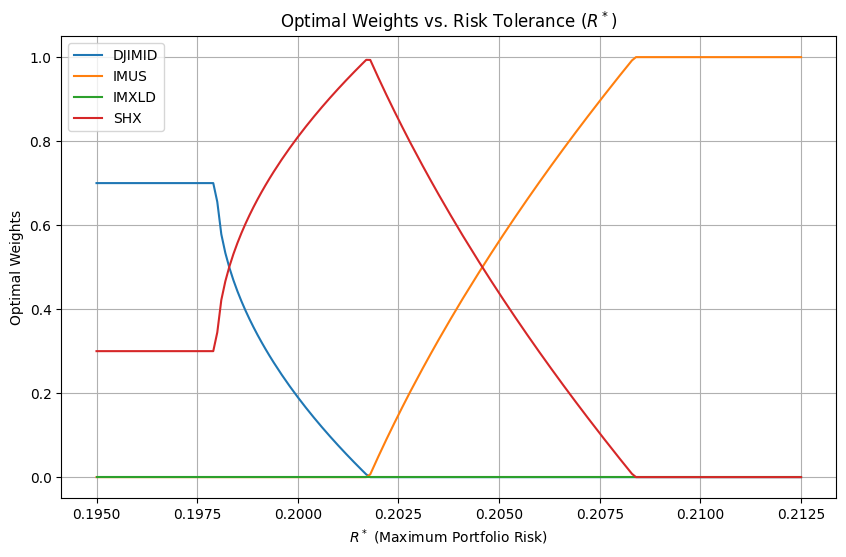

In [ ]:
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices_USA[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weights = test_Rstar(0.05)
weights

array([7.00032544e-01, 0.00000000e+00, 2.18923472e-16, 2.99967454e-01])

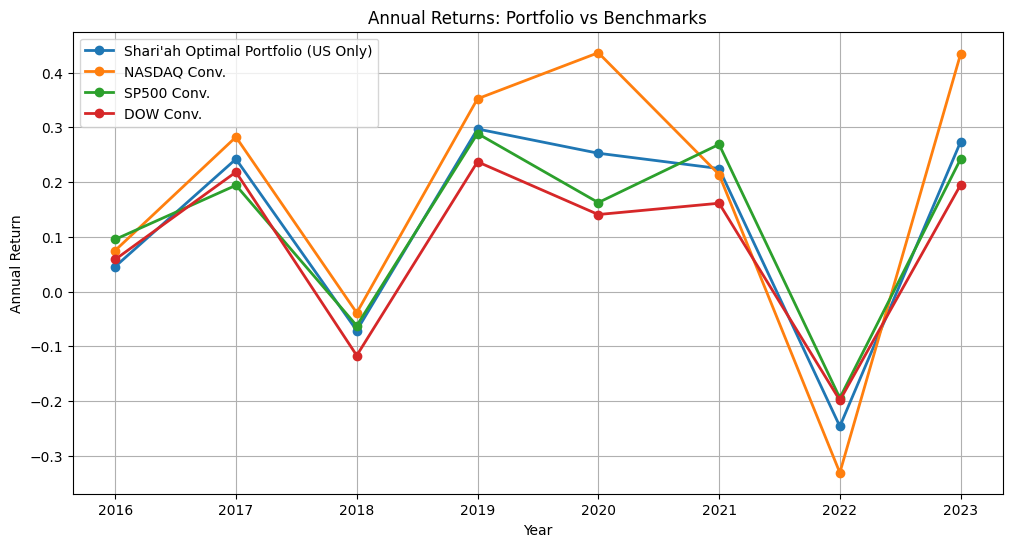

In [ ]:
portfolio_weights = np.array(weights)

annual_returns = {
    "DJIMID": [0.038071, 0.251854, -0.083622, 0.289595, 0.266774, 0.184870, -0.251276, 0.255713],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "NDX": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "W1DOW": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "SPX": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "NDX": [0.075031, 0.282414, -0.038837, 0.352256, 0.436404, 0.213891, -0.331000, 0.434231],
}

# Portfolio assets
portfolio_assets = ["DJIMID", "IMUS", "IMXLD", "SHX"]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Calculate annual returns for portfolio
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        portfolio_weights[i] * annual_returns[asset][year_index] for i, asset in enumerate(portfolio_assets)
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns
w1dow_returns = annual_returns["W1DOW"]
spx_returns = annual_returns["SPX"]
ndx_returns = annual_returns["NDX"]

# Plotting
plt.figure(figsize=(12, 6))

# Portfolio
plt.plot(years, portfolio_annual_returns, label="Shari'ah Optimal Portfolio (US Only)", marker="o", linewidth=2)
# Benchmarks
plt.plot(years, ndx_returns, label="NASDAQ Conv.", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SP500 Conv.", marker="o", linewidth=2)
plt.plot(years, w1dow_returns, label="DOW Conv.", marker="o", linewidth=2)

# Customize plot
plt.title("Annual Returns: Portfolio vs Benchmarks")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
weights = test_Rstar(0.20)
weights

array([1.90287378e-01, 0.00000000e+00, 6.39137181e-17, 8.09712622e-01])

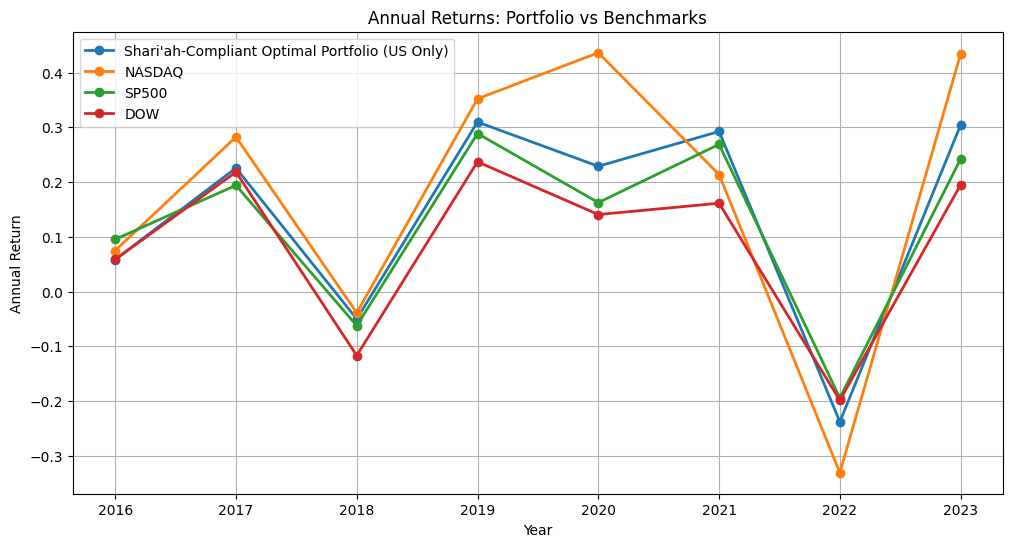

In [ ]:
portfolio_weights = np.array(weights)

annual_returns = {
    "DJIMID": [0.038071, 0.251854, -0.083622, 0.289595, 0.266774, 0.184870, -0.251276, 0.255713],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "NDX": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "W1DOW": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "SPX": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "NDX": [0.075031, 0.282414, -0.038837, 0.352256, 0.436404, 0.213891, -0.331000, 0.434231],
}

# Portfolio assets
portfolio_assets = ["DJIMID", "IMUS", "IMXLD", "SHX"]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Calculate annual returns for portfolio
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        portfolio_weights[i] * annual_returns[asset][year_index] for i, asset in enumerate(portfolio_assets)
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns
w1dow_returns = annual_returns["W1DOW"]
spx_returns = annual_returns["SPX"]
ndx_returns = annual_returns["NDX"]

# Plotting
plt.figure(figsize=(12, 6))

# Portfolio
plt.plot(years, portfolio_annual_returns, label="Shari'ah-Compliant Optimal Portfolio (US Only)", marker="o", linewidth=2)
# Benchmarks
plt.plot(years, ndx_returns, label="NASDAQ", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SP500", marker="o", linewidth=2)
plt.plot(years, w1dow_returns, label="DOW", marker="o", linewidth=2)

# Customize plot
plt.title("Annual Returns: Portfolio (Risk Tolerance 20%) vs Benchmarks")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.grid(True)
plt.show()

## **Optimizer Again: with International Indices**

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    # "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    # "SPX (Covn.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    # "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

In [ ]:
annual_volatility_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    # 'NDX (Conv.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    # 'SPX (Conv.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    # "W1DOW (Conv.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


In [ ]:
# Objective function: maximize portfolio return
def portfolio_return(weights):
    return -np.dot(weights, mean_returns)

# Portfolio risk
def portfolio_risk(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [ ]:
# Convert data to DataFrames
returns_df = pd.DataFrame(annual_returns_data).set_index("Year")
volatility_df = pd.DataFrame(annual_volatility_data).set_index("Year")

# Calculate average returns and covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

In [ ]:
def test_Rstar(R_star):

  # Number of assets
  n_assets = len(mean_returns)

  # Constraints
  constraints = [
      {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights sum to 1
      {"type": "ineq", "fun": lambda w: R_star - portfolio_risk(w)},  # Risk constraint
  ]

  # Bounds for weights (no short selling)
  bounds = [(0, 1) for _ in range(n_assets)]

  # Initial guess
  init_guess = np.array([1 / n_assets] * n_assets)

  # Optimization
  result = minimize(
      portfolio_return,  # Minimize the negative return
      init_guess,
      method="SLSQP",
      bounds=bounds,
      constraints=constraints,
  )

  # Optimal weights
  optimal_weights = result.x
  optimal_return = -result.fun
  optimal_risk = portfolio_risk(optimal_weights)

  # print("Optimal Weights:", optimal_weights)
  # print("Expected Return:", optimal_return)
  # print("Portfolio Risk:", optimal_risk)

  return optimal_weights

In [ ]:
islamic_indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]

In [ ]:
R_stars = np.linspace(0.05, 0.25, 41)
print(R_stars)

[0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095 0.1   0.105
 0.11  0.115 0.12  0.125 0.13  0.135 0.14  0.145 0.15  0.155 0.16  0.165
 0.17  0.175 0.18  0.185 0.19  0.195 0.2   0.205 0.21  0.215 0.22  0.225
 0.23  0.235 0.24  0.245 0.25 ]


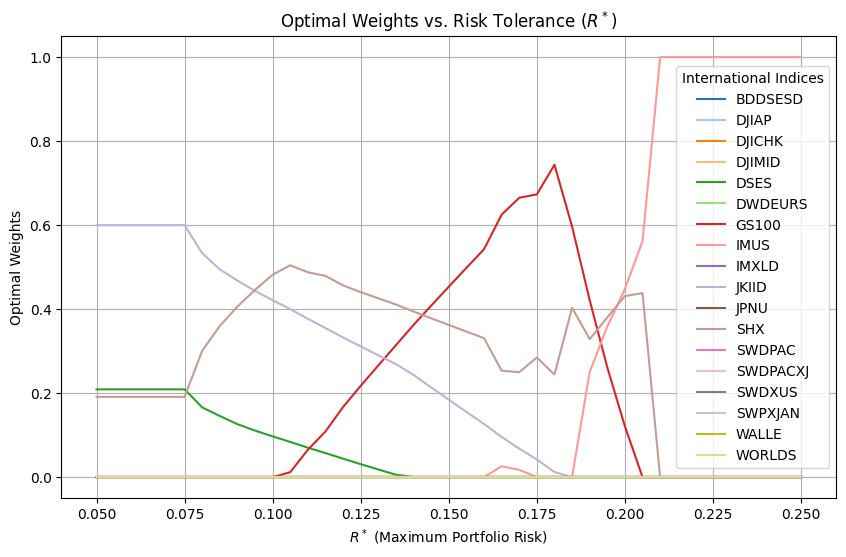

In [ ]:
from matplotlib import cm
optimal_weights = []

for r in R_stars:
    weights = test_Rstar(r)
    optimal_weights.append(weights)

optimal_weights = np.array(optimal_weights)
cmap = plt.colormaps['tab20']  # New colormap API
colors = [cmap(i / 20) for i in range(20)] + ['#000000']

# Plot
plt.figure(figsize=(10, 6))
n_assets = optimal_weights.shape[1]

for i in range(n_assets):
    plt.plot(R_stars, optimal_weights[:, i], label=islamic_indices[i], color=colors[i])

plt.title("Optimal Weights vs. Risk Tolerance ($R^*$)")
plt.xlabel("$R^*$ (Maximum Portfolio Risk)")
plt.ylabel("Optimal Weights")
plt.legend(title="International Indices")
plt.grid(True)
plt.show()

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX (Conv.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

In [ ]:
weights = test_Rstar(0.2)
weights

array([6.04519852e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.80610932e-17, 1.20879636e-01, 4.48025598e-01,
       2.93528977e-16, 0.00000000e+00, 0.00000000e+00, 4.31094765e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

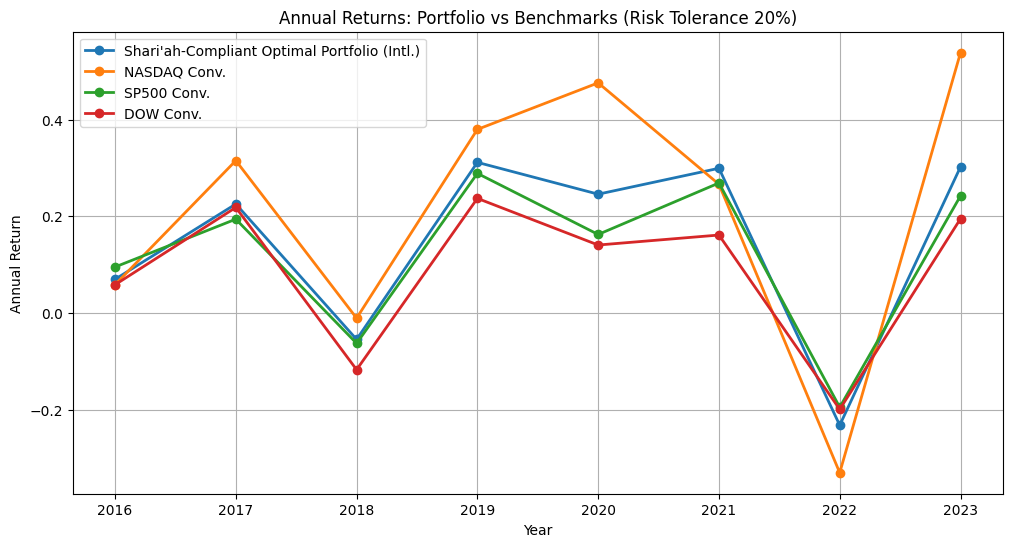

In [ ]:
portfolio_weights = np.array(weights)

# Ensure portfolio weights and indices match
indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]

# Normalize weights if needed
portfolio_weights /= portfolio_weights.sum()

# Calculate annual returns for portfolio
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        portfolio_weights[i] * annual_returns_data[indices[i]][year_index] for i in range(len(indices))
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns
ndx_returns = annual_returns_data["NDX (Conv.)"]
spx_returns = annual_returns_data["SPX (Conv.)"]
w1dow_returns = annual_returns_data["W1DOW (Conv.)"]

# Plotting
plt.figure(figsize=(12, 6))

# Portfolio
plt.plot(years, portfolio_annual_returns, label="Shari'ah-Compliant Optimal Portfolio (Intl.)", marker="o", linewidth=2)
# Benchmarks
plt.plot(years, ndx_returns, label="NASDAQ Conv.", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SP500 Conv.", marker="o", linewidth=2)
plt.plot(years, w1dow_returns, label="DOW Conv.", marker="o", linewidth=2)

# Customize plot
plt.title("Annual Returns: Portfolio vs Benchmarks (Risk Tolerance 20%)")
plt.xlabel("Year")
plt.ylabel("Annual Return")
plt.legend()
plt.grid(True)
plt.show()

# **Multi-Objective Optimal Portfolio**

In [ ]:
annual_returns = {
    "BDDSESD": 0.0134, "DJIAP": 0.0812, "DJICHK": 0.0036, "DJIMID": 0.1207,
    "DSES": 0.0146, "DWDEURS": 0.0423, "GS100": 0.1485, "IMUS": 0.1557,
    "IMXLD": 0.1523, "JKIID": -0.0076, "JPNU": 0.0808, "SHX": 0.1253,
    "SWDPAC": 0.1292, "SWDPACXJ": 0.1188, "SWDXUS": 0.1242, "SWPXJAN": 0.1236,
    "WALLE": 0.0605, "WORLDS": 0.0595
}

annual_volatility = {
    "BDDSESD": 0.1608, "DJIAP": 0.1574, "DJICHK": 0.2385464, "DJIMID": 0.1494,
    "DSES": 0.1025, "DWDEURS": 0.1938, "GS100": 0.1729, "IMUS": 0.1887,
    "IMXLD": 0.1586, "JKIID": 0.1698, "JPNU": 0.1668, "SHX": 0.1744,
    "SWDPAC": 0.1691, "SWDPACXJ": 0.1713, "SWDXUS": 0.1642, "SWPXJAN": 0.1663,
    "WALLE": 0.1474, "WORLDS": 0.1383
}

In [ ]:
# Correlation (optional, assumed as 0.3 between all for this example)
correlation_matrix = np.full((len(annual_returns), len(annual_returns)), 0.3)
np.fill_diagonal(correlation_matrix, 1)

# Compute the covariance matrix
volatility_vector = np.array(list(annual_volatility.values()))
covariance_matrix = np.outer(volatility_vector, volatility_vector) * correlation_matrix

# Portfolio optimization
def portfolio_variance(weights, cov_matrix):
    """Calculate portfolio variance given weights and covariance matrix."""
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, returns):
    """Calculate portfolio return given weights and annual returns."""
    return np.dot(weights, returns)

# Number of assets
num_assets = len(annual_returns)

# Optimization setup
target_return = 0.12  # Desired portfolio return
returns_vector = np.array(list(annual_returns.values()))

# Constraints: weights sum to 1, portfolio return >= target
constraints = [
    {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Sum of weights = 1
    {"type": "ineq", "fun": lambda w: portfolio_return(w, returns_vector) - target_return}  # Portfolio return >= target
]

# Bounds: weights must be between 0 and 1
bounds = [(0, 1) for _ in range(num_assets)]

# Initial guess for weights (equal allocation)
initial_weights = np.array([1 / num_assets] * num_assets)

# Minimize portfolio variance
result = minimize(portfolio_variance, initial_weights, args=(covariance_matrix,),
                  method="SLSQP", bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x

# Display results
asset_names = list(annual_returns.keys())
optimal_portfolio = pd.DataFrame({"Asset": asset_names, "Weight": optimal_weights})
print(optimal_portfolio)

       Asset        Weight
0    BDDSESD  1.891062e-18
1      DJIAP  3.140280e-02
2     DJICHK  1.206471e-17
3     DJIMID  1.405521e-01
4       DSES  6.224926e-02
5    DWDEURS  3.361760e-18
6      GS100  1.033916e-01
7       IMUS  5.554819e-02
8      IMXLD  1.678518e-01
9      JKIID  1.222888e-17
10      JPNU  0.000000e+00
11       SHX  5.584338e-02
12    SWDPAC  8.239916e-02
13  SWDPACXJ  5.516852e-02
14    SWDXUS  9.123884e-02
15   SWPXJAN  8.229450e-02
16     WALLE  2.209255e-02
17    WORLDS  4.996737e-02


In [ ]:
NDX_returns = [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053]
SPX_returns = [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305]

target_returns = [0.095350, 0.315156, -0.010390, 0.379641, 0.475802, 0.268927, -0.194428, 0.538053]

In [ ]:
# Correlation matrix (assume 0.3 correlation for simplicity)
correlation_matrix = np.full((len(annual_returns), len(annual_returns)), 0.3)
np.fill_diagonal(correlation_matrix, 1)

# Compute the covariance matrix
volatility_vector = np.array(list(annual_volatility.values()))
covariance_matrix = np.outer(volatility_vector, volatility_vector) * correlation_matrix

# Portfolio optimization functions
def portfolio_variance(weights, cov_matrix):
    """Calculate portfolio variance."""
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, returns):
    """Calculate portfolio return."""
    return np.dot(weights, returns)

# Number of assets
num_assets = len(annual_returns)
returns_vector = np.array(list(annual_returns.values()))

# Store results
optimal_portfolios = []

# Iterate through each target return
for target_return in target_returns:
    # Define constraints
    constraints = [
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Sum of weights = 1
        {"type": "ineq", "fun": lambda w: portfolio_return(w, returns_vector) - target_return}  # Return >= target
    ]

    # Bounds for weights
    bounds = [(0, 1) for _ in range(num_assets)]

    # Initial guess
    initial_weights = np.array([1 / num_assets] * num_assets)

    # Minimize portfolio variance
    result = minimize(portfolio_variance, initial_weights, args=(covariance_matrix,),
                      method="SLSQP", bounds=bounds, constraints=constraints)

    # Store results
    optimal_weights = result.x
    optimal_portfolios.append(optimal_weights)

# Convert results to a DataFrame for readability
asset_names = list(annual_returns.keys())
optimal_portfolios_df = pd.DataFrame(optimal_portfolios, columns=asset_names)
optimal_portfolios_df.index = [f"Year {i+1}" for i in range(len(target_returns))]

# Display the results
print(optimal_portfolios_df)

             BDDSESD         DJIAP        DJICHK        DJIMID          DSES  \
Year 1  1.026103e-17  3.937562e-02  1.812044e-17  1.249726e-01  2.133509e-01   
Year 2  6.645166e-17  1.722764e-12  5.623041e-13  7.308096e-13  3.405017e-14   
Year 3  4.007359e-02  4.944242e-02  6.556035e-19  7.596835e-02  4.146946e-01   
Year 4  3.268580e-17  1.167224e-12  3.035613e-14  1.575612e-15  1.801907e-12   
Year 5  2.717518e-13  1.806297e-13  3.549029e-16  7.417701e-16  8.341505e-13   
Year 6  1.504099e-12  4.046456e-14  1.805034e-16  5.519378e-17  4.160291e-18   
Year 7  4.007359e-02  4.944242e-02  6.556035e-19  7.596835e-02  4.146946e-01   
Year 8  0.000000e+00  1.255285e-12  2.121642e-13  0.000000e+00  0.000000e+00   

             DWDEURS         GS100          IMUS         IMXLD         JKIID  \
Year 1  2.631956e-18  6.601276e-02  2.713694e-02  1.256830e-01  0.000000e+00   
Year 2  1.993954e-12  7.517558e-13  1.000000e+00  3.051008e-13  1.873288e-16   
Year 3  0.000000e+00  1.525275e-02  4.9

In [ ]:
islamic_indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]

In [ ]:
Years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [ ]:
annual_returns_data = {
    "Year": [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX (Conv.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

# **ANOTHER Mean-Variance Model, this time with CVaR**

In [6]:
annual_returns_islamic = {
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

In [7]:
annual_volatility_islamic = {
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}


In [8]:
annual_cvar_islamic = {
 'BDDSESD': [-0.011015783463077947,  -0.019077490405216276,  -0.015390212660872342,  -0.02607519729330544,  -0.03844126679227555,  -0.018559935727274202,  -0.038427318066593476,  -0.018348139173753913],
 'DJIAP': [-0.022069545670314068,  -0.008391584012864618,  -0.02228661065626571,  -0.013960850967090726,  -0.027710782840621784,  -0.021334413090785282,  -0.026373865320180063,  -0.015993036781201238],
 'DJICHK': [-0.024233751584493583,  -0.0141061671441998,  -0.026760684241930635,  -0.021242087076636704,  -0.04188109663914921,  -0.04264259466718505,  -0.05215452551278687,  -0.03212052698441921],
 'DJIMID': [-0.017848926461560742,  -0.0077934304561041445,  -0.021431256542833878,  -0.01657194842440241,  -0.04475702805145595,  -0.017525516894779266,  -0.030790429539090777,  -0.014688000256035724],
 'DSES': [-0.008765002954733758,  -0.009368364410850085,  -0.012712269995979356,  -0.015878113112141018,  -0.03151803524331072,  -0.018049832394562645,  -0.01695239711785901,  -0.005835068997288817],
 'DWDEURS': [-0.027724907760220092,  -0.010748120281788372,  -0.02025715527556499,  -0.017181922616874908,  -0.04561056989379923,  -0.019583117638875682,  -0.035265833044925254,  -0.02137629114458715],
 'GS100': [-0.027844230084068947,  -0.011057481645769661,  -0.02350713862257801,  -0.014782358975253049,  -0.030576842021747024,  -0.02435005370897157,  -0.02792561716748162,  -0.01858259433321334],
 'IMUS': [-0.020464728098673092,  -0.01028690783857102,  -0.028413002453677248,  -0.02105926484486491,  -0.05509672824132366,  -0.02113227369543503,  -0.03748667811582054,  -0.016916714318830982],
 'IMXLD': [-0.0171133382937043,  -0.008369493087102237,  -0.022698462103057943,  -0.016578801587085894,  -0.042639017659664,  -0.015978766471996853,  -0.030467541665330708,  -0.014693908683777466],
 'JKIID': [-0.023374412290117608,  -0.013780341030211474,  -0.029828018026320652,  -0.02122912637500781,  -0.05170863457514112,  -0.022477206603183923,  -0.018984215493369032,  -0.01808820765949326],
 'JPNU': [-0.02912874619823117,  -0.01134822770369869,  -0.024620331044670027,  -0.014102271395768426,  -0.029026381541418643,  -0.023887310407531552,  -0.028230002739854473,  -0.01882636357675912],
 'SHX': [-0.019878652222250978,  -0.00980224154065414,  -0.028507322912288278,  -0.020843443036203873,  -0.05559985688302505,  -0.019932224225847967,  -0.03646868663801073,  -0.01652465033652821],
 'SWDPACXJ': [-0.0247682097625875,  -0.01410082964438082,  -0.02254304661994093,  -0.018465290283812993,  -0.04509508547540053,  -0.023431232174010937,  -0.03157591459672196,  -0.020570837976157115],
 'SWDPAC': [-0.02875601025257058,  -0.010746708594269943,  -0.024053405090553256,  -0.01644136504707021,  -0.030875851814608467,  -0.02247538667483314,  -0.031204610585519273,  -0.018792539718440235],
 'SWDXUS': [-0.022350476345238072,  -0.008142885649818705,  -0.018882198571479096,  -0.012984424081829453,  -0.03663247441765272,  -0.01858486036315549,  -0.029889387064633288,  -0.01691004803121585],
 'SWPXJAN': [-0.024126437518517754,  -0.013357022793027409,  -0.024041200318761318,  -0.01873881880848057,  -0.038502059007170866,  -0.020518436854002366,  -0.025587332779472807,  -0.015439902764617161],
 'WALLE': [-0.022589281517318656,  -0.012195516559790513,   -0.021311371525478164,  -0.014990138474881561,  -0.03881175994609173,  -0.01887770909211535,  -0.026446997966173003,  -0.012908301839377643],
 'WORLDS': [-0.018413837123206205,  -0.007017891878892431,  -0.01854879776867552,  -0.015216599575659599,  -0.04397261284843558,  -0.017019499850389027,  -0.02613507597804537,  -0.013334949010582528]
}

In [9]:
years = np.arange(2016, 2024)

# Convert data to arrays
assets = list(annual_returns_islamic.keys())
n_assets = len(assets)
n_years = len(years)

returns_matrix = np.array([annual_returns_islamic[asset] for asset in assets]).T
volatility_matrix = np.array([annual_volatility_islamic[asset] for asset in assets]).T
cvar_matrix = np.array([annual_cvar_islamic[asset] for asset in assets]).T

# Define objective function (negative for maximization)
def mvc_objective(weights, exp_returns, cov_matrix, cvar_vector, alpha=0.5, beta=0.3, gamma=0.2):
   # max E(R) - alpha * Var(R) - beta * CVaR(R)
    portfolio_return = np.dot(weights, exp_returns)
    portfolio_variance = weights.T @ cov_matrix @ weights
    portfolio_cvar = np.dot(weights, cvar_vector)
    return -(portfolio_return - alpha * portfolio_variance - beta * portfolio_cvar)

# Optimization settings
optimal_portfolios = []
for year in range(n_years):
    # Annual data for the year
    returns_vector = returns_matrix[year]
    volatility_vector = volatility_matrix[year]
    cvar_vector = cvar_matrix[year]

    # Correlation matrix (simplified to 0.3 correlation)
    correlation_matrix = np.full((n_assets, n_assets), 0.3)
    np.fill_diagonal(correlation_matrix, 1)

    # Covariance matrix
    cov_matrix = np.outer(volatility_vector, volatility_vector) * correlation_matrix

    # Constraints: Weights sum to 1, no short-selling
    constraints = [{"type": "eq", "fun": lambda w: np.sum(w) - 1}]
    bounds = [(0, 1) for _ in range(n_assets)]
    initial_weights = np.array([1 / n_assets] * n_assets)

    # Minimize negative MVC objective
    result = minimize(
        mvc_objective,
        initial_weights,
        args=(returns_vector, cov_matrix, cvar_vector),
        method="SLSQP",
        bounds=bounds,
        constraints=constraints,
    )

    # Store optimal weights
    optimal_weights = result.x
    optimal_portfolios.append(optimal_weights)

# Convert results to a DataFrame
optimal_portfolios_df = pd.DataFrame(optimal_portfolios, columns=assets)
optimal_portfolios_df.index = years

# Display results
print("Optimal Portfolio Weights for Each Year:")
print(optimal_portfolios_df)

# Save the results for later analysis
optimal_portfolios_df.to_csv("optimal_portfolios_mvc.csv", index_label="Year")

Optimal Portfolio Weights for Each Year:
           BDDSESD         DJIAP        DJICHK        DJIMID          DSES  \
2016  0.000000e+00  0.000000e+00  3.922637e-16  0.000000e+00  0.000000e+00   
2017  2.826268e-16  0.000000e+00  1.000000e+00  0.000000e+00  1.817654e-17   
2018  0.000000e+00  2.760908e-16  0.000000e+00  0.000000e+00  0.000000e+00   
2019  4.932013e-16  0.000000e+00  0.000000e+00  0.000000e+00  8.375308e-17   
2020  6.997795e-01  2.570729e-01  4.314753e-02  0.000000e+00  3.209238e-17   
2021  0.000000e+00  0.000000e+00  2.327909e-16  0.000000e+00  0.000000e+00   
2022  0.000000e+00  3.717443e-17  1.180445e-16  6.651866e-17  0.000000e+00   
2023  6.247439e-16  1.027154e-16  0.000000e+00  0.000000e+00  0.000000e+00   

           DWDEURS         GS100          IMUS         IMXLD         JKIID  \
2016  1.809396e-16  4.884831e-16  3.933672e-17  0.000000e+00  4.255976e-01   
2017  1.749920e-16  0.000000e+00  3.499094e-17  0.000000e+00  3.043141e-16   
2018  0.000000e+00  2.

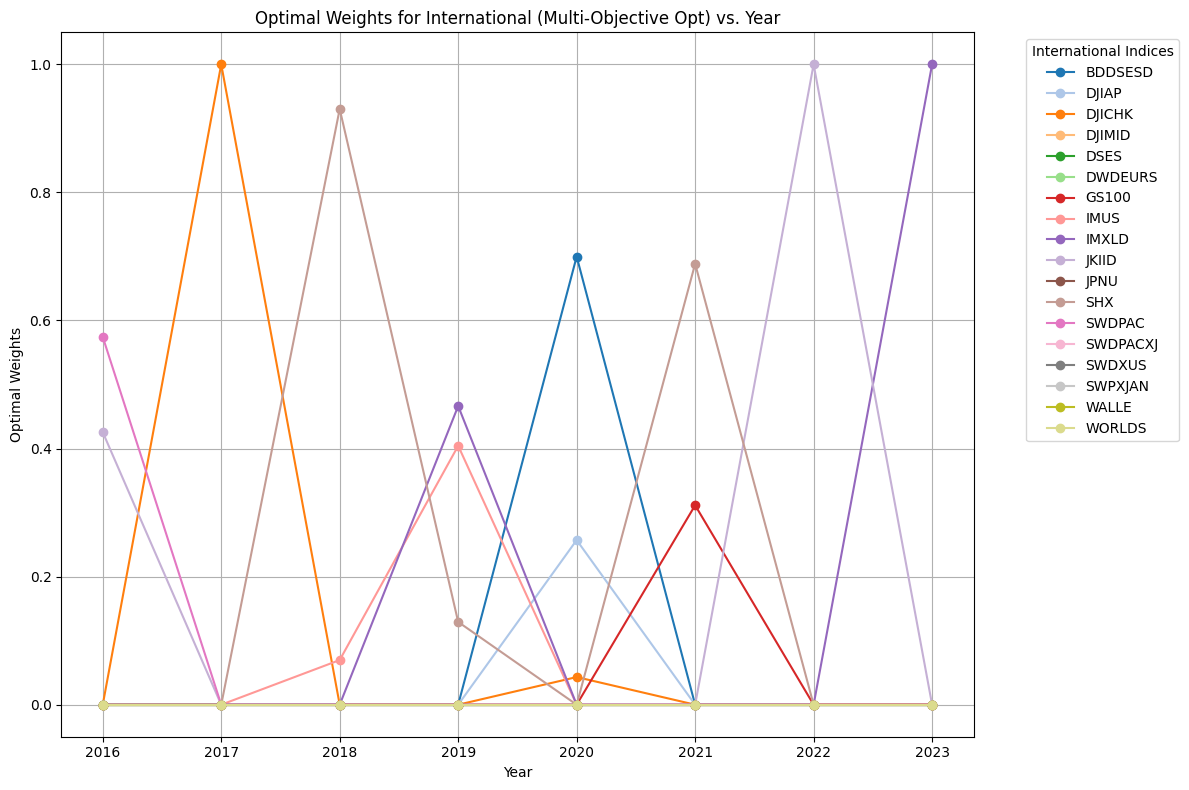

In [10]:
import matplotlib.cm as cm

# Assuming `optimal_portfolios_df` is the DataFrame with optimal weights
assets = optimal_portfolios_df.columns
years = optimal_portfolios_df.index

# Create a color palette with 21 distinct colors
cmap = plt.colormaps['tab20']
colors = [cmap(i / 20) for i in range(20)] + ['#000000']

# Plotting
plt.figure(figsize=(12, 8))
for i, asset in enumerate(assets):
    plt.plot(years, optimal_portfolios_df[asset], label=asset, color=colors[i], marker='o')

plt.title("Optimal Weights for International (Multi-Objective Opt) vs. Year")
plt.xlabel("Year")
plt.ylabel("Optimal Weights")
plt.legend(title="International Indices", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()
plt.tight_layout()
plt.show()

In [11]:
years = np.arange(2016, 2024)

# Convert data to arrays
assets = list(annual_returns_islamic.keys())
n_assets = len(assets)

returns_matrix = np.array([annual_returns_islamic[asset] for asset in assets]).T
volatility_matrix = np.array([annual_volatility_islamic[asset] for asset in assets]).T
cvar_matrix = np.array([annual_cvar_islamic[asset] for asset in assets]).T

# Aggregate data across all years
mean_returns = np.mean(returns_matrix, axis=0)  # Average annual returns
mean_volatility = np.mean(volatility_matrix, axis=0)  # Average annual volatility
mean_cvar = np.mean(cvar_matrix, axis=0)  # Average annual CVaR

# Define the objective function
def mvc_objective(weights, exp_returns, cov_matrix, cvar_vector, alpha=0.5, beta=0.3, gamma=0.2):
    # Maximize: E(R) - alpha * Var(R) - beta * CVaR(R)
    portfolio_return = np.dot(weights, exp_returns)
    portfolio_variance = weights.T @ cov_matrix @ weights
    portfolio_cvar = np.dot(weights, cvar_vector)
    return -(portfolio_return - alpha * portfolio_variance - beta * portfolio_cvar)

# Correlation matrix (assume 0.3 correlation between assets)
correlation_matrix = np.full((n_assets, n_assets), 0.3)
np.fill_diagonal(correlation_matrix, 1)

# Covariance matrix
cov_matrix = np.outer(mean_volatility, mean_volatility) * correlation_matrix

# Constraints: Weights sum to 1, no short-selling
constraints = [{"type": "eq", "fun": lambda w: np.sum(w) - 1}]
bounds = [(0, 1) for _ in range(n_assets)]
initial_weights = np.array([1 / n_assets] * n_assets)

# Minimize the negative MVC objective
result = minimize(
    mvc_objective,
    initial_weights,
    args=(mean_returns, cov_matrix, mean_cvar),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)

# Extract the optimal weights
overall_optimal_weights = result.x

# Convert the results to a DataFrame
overall_optimal_portfolio_df = pd.DataFrame(
    [overall_optimal_weights], columns=assets, index=["Overall"]
)

# Display the result
print("Overall Optimal Portfolio Weights Across All Years:")
print(overall_optimal_portfolio_df)

# Save the result for later analysis
overall_optimal_portfolio_df.to_csv("overall_optimal_portfolio_mvc.csv", index_label="Portfolio")

Overall Optimal Portfolio Weights Across All Years:
         BDDSESD         DJIAP  DJICHK        DJIMID          DSES  \
Overall      0.0  2.205531e-16     0.0  5.758122e-18  3.148258e-17   

              DWDEURS         GS100      IMUS    IMXLD  JKIID          JPNU  \
Overall  3.872278e-19  1.942890e-16  0.413147  0.23078    0.0  1.895136e-16   

              SHX  SWDPAC  SWDPACXJ  SWDXUS       SWPXJAN         WALLE  \
Overall  0.356072     0.0       0.0     0.0  3.231536e-17  1.902882e-16   

               WORLDS  
Overall  3.075665e-17  


In [12]:
islamic_indices = [
    "BDDSESD", "DJIAP", "DJICHK", "DJIMID", "DSES", "DWDEURS",
    "GS100", "IMUS", "IMXLD", "JKIID", "JPNU", "SHX",
    "SWDPAC", "SWDPACXJ", "SWDXUS", "SWPXJAN", "WALLE", "WORLDS"
]

In [45]:
returns_matrix = np.array([annual_returns_islamic[asset] for asset in assets]).T
volatility_matrix = np.array([annual_volatility_islamic[asset] for asset in assets]).T
cvar_matrix = np.array([annual_cvar_islamic[asset] for asset in assets]).T

# Aggregate data across all years
mean_returns = np.mean(returns_matrix, axis=0)  # Average annual returns
mean_volatility = np.mean(volatility_matrix, axis=0)  # Average annual volatility
mean_cvar = np.mean(cvar_matrix, axis=0)  # Average annual CVaR

# Define the objective function
def mvc_objective(weights, exp_returns, cov_matrix, cvar_vector, alpha=0.5, beta=0.3, gamma=0.2):
    # Maximize: E(R) - alpha * Var(R) - beta * CVaR(R)
    portfolio_return = np.dot(weights, exp_returns)
    portfolio_variance = weights.T @ cov_matrix @ weights
    portfolio_cvar = np.dot(weights, cvar_vector)
    return -(portfolio_return - alpha * portfolio_variance - beta * portfolio_cvar)

# Correlation matrix (assume 0.3 correlation between assets)
correlation_matrix = np.full((n_assets, n_assets), 0.3)
np.fill_diagonal(correlation_matrix, 1)

# Covariance matrix
cov_matrix = np.outer(mean_volatility, mean_volatility) * correlation_matrix

# Constraints: Weights sum to 1, no short-selling
constraints = [{"type": "eq", "fun": lambda w: np.sum(w) - 1}]
bounds = [(0, 1) for _ in range(n_assets)]
initial_weights = np.array([1 / n_assets] * n_assets)

# Minimize the negative MVC objective
result = minimize(
    mvc_objective,
    initial_weights,
    args=(mean_returns, cov_matrix, mean_cvar),
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)

# Extract the optimal weights
overall_optimal_weights = result.x

# Convert the results to a DataFrame
overall_optimal_portfolio_df = pd.DataFrame(
    [overall_optimal_weights], columns=assets, index=["Overall"]
)

# Display the result
print("Overall Optimal Portfolio Weights Across All Years:")
print(overall_optimal_portfolio_df)

Overall Optimal Portfolio Weights Across All Years:
         BDDSESD         DJIAP  DJICHK        DJIMID          DSES  \
Overall      0.0  2.205531e-16     0.0  5.758122e-18  3.148258e-17   

              DWDEURS         GS100      IMUS    IMXLD  JKIID          JPNU  \
Overall  3.872278e-19  1.942890e-16  0.413147  0.23078    0.0  1.895136e-16   

              SHX  SWDPAC  SWDPACXJ  SWDXUS       SWPXJAN         WALLE  \
Overall  0.356072     0.0       0.0     0.0  3.231536e-17  1.902882e-16   

               WORLDS  
Overall  3.075665e-17  


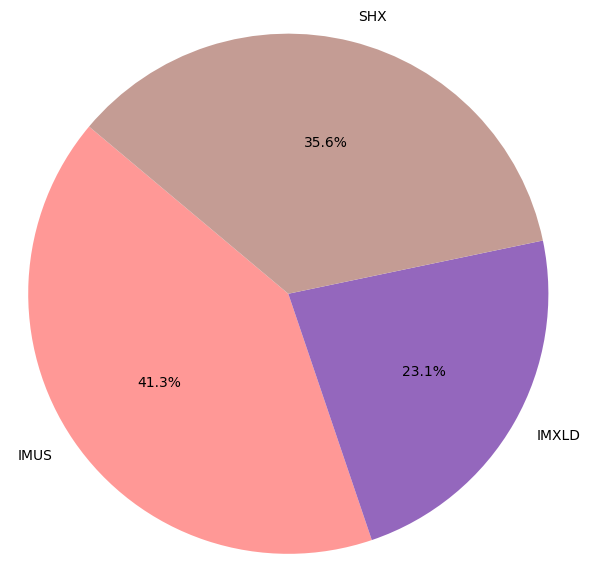

In [34]:
overall_optimal_portfolio_df.to_csv("overall_optimal_portfolio_mvc.csv", index_label="Portfolio")

# Normalize weights for pie chart
normalized_weights = overall_optimal_weights / np.sum(overall_optimal_weights)

# Filter out indices with zero weights
non_zero_indices = normalized_weights > 0.1
filtered_weights = normalized_weights[non_zero_indices]
filtered_assets = np.array(assets)[non_zero_indices]
filtered_colors = [colors[i] for i, include in enumerate(non_zero_indices) if include]

# Plot pie chart with non-zero weights
plt.figure(figsize=(6, 6))
plt.pie(
    filtered_weights,
    labels=filtered_assets,
    autopct='%1.1f%%',
    colors=filtered_colors,
    startangle=140
)

# Title and display
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
annual_returns_data = {
    "BDDSESD": [0.06909374212652586, 0.10800021021501971, -0.12053857757896513, -0.2837154630760179, 0.3960900046210505, 0.1364213880859264, -0.2076464943499864, -0.059360087792764804],
    "DJIAP": [0.020087353689228538, 0.3593084047490065, -0.15333163674427763, 0.21905199401116104, 0.3401534288891057, -0.06013816086367885, -0.26403714182296323, 0.0933960322996703],
    "DJICHK": [0.024206, 0.466692, -0.129877, 0.145304, 0.338443, -0.186382, -0.267146, -0.273209],
    "DJIMID": [0.03807486401834259, 0.25184578651492107, -0.08290460171932368, 0.28859028223123895, 0.2665720930232558, 0.18496913478240096, -0.25062871398355957, 0.25427920383443126],
    "DSES": [0.0744537, 0.158371719, -0.113977907, -0.197447423, 0.237592786, 0.101268161, -0.059867024, 0.009703779],
    "DWDEURS": [0.023141907, 0.230644057, -0.149449875, 0.233887644, 0.072378735, 0.136550049, -0.17908434, 0.17046283],
    "GS100": [0.127845632458612, 0.243628456732491, -0.145823456284567, 0.289564328456273, 0.203784563482562, 0.312734653894562, -0.134657843562348, 0.184567893456734],
    "IMUS": [0.060722, 0.226289, -0.041146, 0.314582, 0.281894, 0.277925, -0.254500, 0.320717],
    "IMXLD": [0.031504, 0.236810, -0.057071, 0.314526, 0.268134, 0.249343, -0.255370, 0.336145],
    "JKIID": [0.172299066, 0.097683364, -0.094953177, 0.019228523, -0.092124023, -0.130390382, 0.03269994, -0.08184358],
    "JPNU": [0.018427, 0.260966, -0.171695, 0.167712, 0.142750, 0.015215, -0.227745, 0.196834],
    "NDX (Conv.)": [0.058858, 0.315156, -0.010390, 0.379641, 0.475802, 0.266273, -0.329675, 0.538053],
    "SHX": [0.063318, 0.219520, -0.042211, 0.314544, 0.220050, 0.317814, -0.234800, 0.315986],
    "SPX (Conv.)": [0.095350, 0.194200, -0.062373, 0.288781, 0.162589, 0.268927, -0.194428, 0.242305],
    "SWDPAC": [0.174582635489123, 0.293845762349867, -0.204756348756284, 0.196738456734568, 0.285634853456238, 0.243856738495627, -0.164758348756348, 0.217348756234856],
    "SWDPACXJ": [0.108934562384567, 0.245734856389467, -0.174563489567834, 0.217384563485672, 0.256738495634857, 0.238476354783465, -0.154872563485672, 0.197634853246589],
    "SWDXUS": [0.139856732489567, 0.268734856394567, -0.184563485673894, 0.224563849567834, 0.214765893475683, 0.276348756394857, -0.193756348756348, 0.234856384567345],
    "SWPXJAN": [0.117834563845672, 0.238475634856238, -0.193847562348576, 0.204736485672348, 0.235683457823485, 0.253846572394856, -0.183745634895673, 0.187634857234856],
    "W1DOW (Conv.)": [0.058675, 0.218378, -0.116831, 0.237123, 0.140754, 0.161398, -0.198776, 0.195064],
    "WALLE": [0.10048045450294585, 0.29546046027438, -0.13120110861472345, 0.13958009881693378, 0.149061018282709, 0.07627549273643974, -0.218697052697843, 0.0690815272593246],
    "WORLDS": [0.05709790709870166, 0.21090899979955902, -0.12099781087445005, 0.22835083094016295, 0.16979157883440532, 0.1744344150844488, -0.18847833061332664, 0.2316685803076035],
}

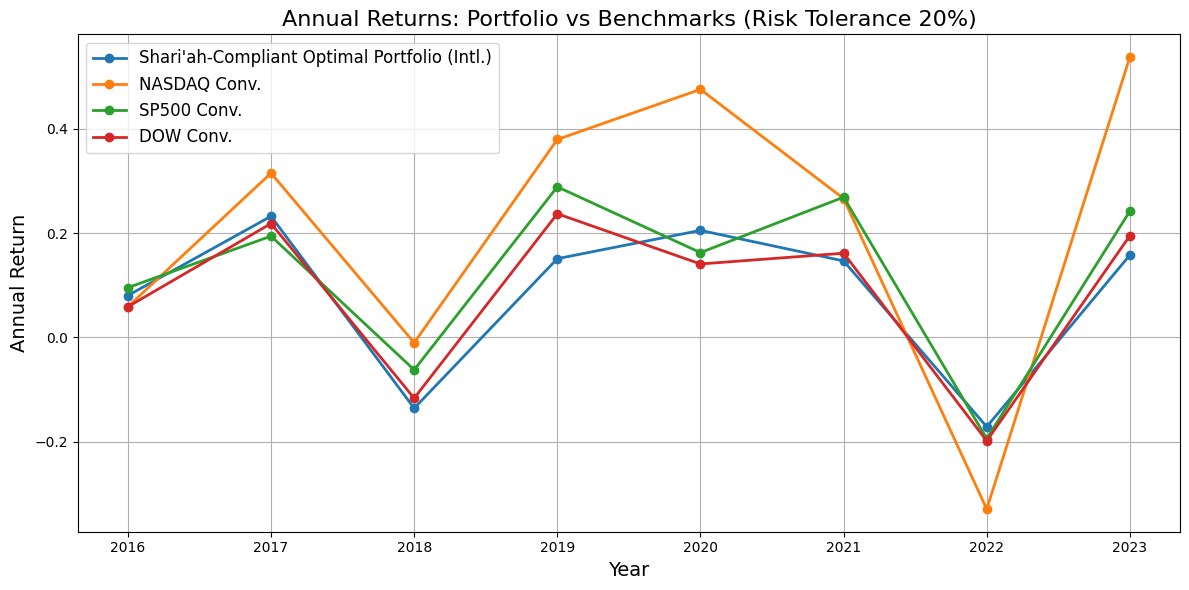

In [36]:
overall_optimal_portfolio_df.to_csv("overall_optimal_portfolio_mvc.csv", index_label="Portfolio")

# Normalize weights for pie chart
normalized_weights = overall_optimal_weights / np.sum(overall_optimal_weights)

# Optimal portfolio weights (replace this with the actual result)
overall_optimal_weights = np.random.rand(18)  # Replace this with actual optimal weights
overall_optimal_weights /= np.sum(overall_optimal_weights)  # Normalize to sum to 1

years = np.arange(2016, 2024)

# Calculate annual returns for the portfolio (weighted by optimal weights)
portfolio_annual_returns = []
for year_index in range(len(years)):
    weighted_return = sum(
        overall_optimal_weights[i] * annual_returns_data[islamic_indices[i]][year_index] for i in range(len(islamic_indices))
    )
    portfolio_annual_returns.append(weighted_return)

# Extract benchmark returns (NDX, SPX, and W1DOW)
ndx_returns = annual_returns_data["NDX (Conv.)"]
spx_returns = annual_returns_data["SPX (Conv.)"]
w1dow_returns = annual_returns_data["W1DOW (Conv.)"]

# Plotting the performance over time
plt.figure(figsize=(12, 6))

# Plot portfolio returns
plt.plot(years, portfolio_annual_returns, label="Shari'ah-Compliant Optimal Portfolio (Intl.)", marker="o", linewidth=2)

# Plot benchmark returns
plt.plot(years, ndx_returns, label="NASDAQ Conv.", marker="o", linewidth=2)
plt.plot(years, spx_returns, label="SP500 Conv.", marker="o", linewidth=2)
plt.plot(years, w1dow_returns, label="DOW Conv.", marker="o", linewidth=2)

# Customize the plot
plt.title("Annual Returns: Portfolio vs Benchmarks (Risk Tolerance 20%)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Return", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
annual_vol_data = {
    'BDDSESD': [0.0875392085470049, 0.14499638865037856, 0.11881010753171335, 0.18543398411832931, 0.33374994158486904, 0.1434457342596485, 0.20715881824488563, 0.11131346038851515],
    'DJIAP': [0.14433395510657923, 0.07498039415491844, 0.14529277703728957, 0.10671941346170835, 0.19359556373462336, 0.14957804366966013, 0.20991021321437864, 0.13118966489241296],
    "DJICHK": [0.1753571, 0.1076128, 0.1873998, 0.1479641, 0.2850882, 0.3020640, 0.4467626, 0.2939986],
    'DJIMID': [0.11901746418912801, 0.05788817742464218, 0.13709128624484113, 0.10880989648891046, 0.2699932247656264, 0.1253448990298722, 0.2288604794248049, 0.1205086191404613],
    "DSES": [0.073384502, 0.075422588, 0.098779069, 0.11899898, 0.231973313, 0.143478362, 0.115147256, 0.040632366],
    'DWDEURS': [0.19075566991454088, 0.09155812866184466, 0.14216183681205943, 0.11816493156901824, 0.2797671951068523, 0.13757851634559284, 0.25294041321222493, 0.15218352100902155],
    "GS100": [0.179495, 0.086236, 0.150194, 0.113551, 0.210246, 0.162297, 0.222238, 0.152853],
    'IMUS': [0.13380513089397714, 0.0707830578224628, 0.1803184000324627, 0.1370554239885878, 0.3449919148647684, 0.15099064968256626, 0.2778275275050915, 0.14481483659644478],
    'IMXLD': [0.11708503898622238, 0.06114294947882269, 0.14788922684219163, 0.11309732591494844, 0.25756152177064195, 0.11023269848994101, 0.21192371390021628, 0.11091626622470276],
    "JKIID": [0.189597, 0.114086, 0.206422, 0.159429, 0.338163, 0.177356, 0.144058, 0.127463],
    "JPNU": [0.200270, 0.088140, 0.161294, 0.114655, 0.217467, 0.163683, 0.220809, 0.155759],
    'NDX (Conv.)': [0.16129579279359696, 0.10395103007890223, 0.22765876858863696, 0.16436730310326927, 0.36941634986181027, 0.18475834433994737, 0.3255051043175067, 0.18055476451427432],
    "SHX": [0.158177, 0.131907, 0.069169, 0.181795, 0.348485, 0.145785, 0.268781, 0.142943],
    'SPX (Conv.)': [0.13059418948848608, 0.06687328600588563, 0.17131555860729908, 0.12527976301392826, 0.350710046466655, 0.1302732090205454, 0.24209074640154613, 0.130905789921887],
    'SWDPAC': [0.19032964959556084, 0.08860315904635561, 0.15075123285518147, 0.11850910360413837, 0.21833748812468204, 0.15332152348735117, 0.2366104463512989, 0.14497635058420205],
    'SWDPACXJ': [0.176334261588443, 0.10459182760561625, 0.15696905530211896, 0.1323606413192641, 0.286363917373486, 0.16719387037877015, 0.2428193694336159, 0.17686671404481802],
    'SWDXUS': [0.1578736421021444, 0.07436707165153872, 0.12116177282560203, 0.09290003860911002, 0.23254706081119172, 0.1246725601385682, 0.2177430555254115, 0.1264621507554208],
    'SWPXJAN': [0.16131214572462033, 0.09733960461917751, 0.159085626686277, 0.12370481556483938, 0.23778989191839492, 0.15051344370659916, 0.18913749425618742, 0.13064682355780072],
    "W1DOW (Conv.)": [0.114620, 0.051328, 0.109634, 0.087911, 0.245001, 0.097510, 0.175127, 0.097348],
    'WALLE': [0.16373932484769185, 0.09105778573461001, 0.14379020930126393, 0.10237650136823713, 0.22608257558866415, 0.13510984582109567, 0.1745295208257555, 0.10340612167745108],
    'WORLDS': [0.12503766775638295, 0.05730907024292672, 0.1194308918595986, 0.10101097341588143, 0.2564615302151613, 0.11230625726649177, 0.19425601261790224, 0.10856827994247145],
}

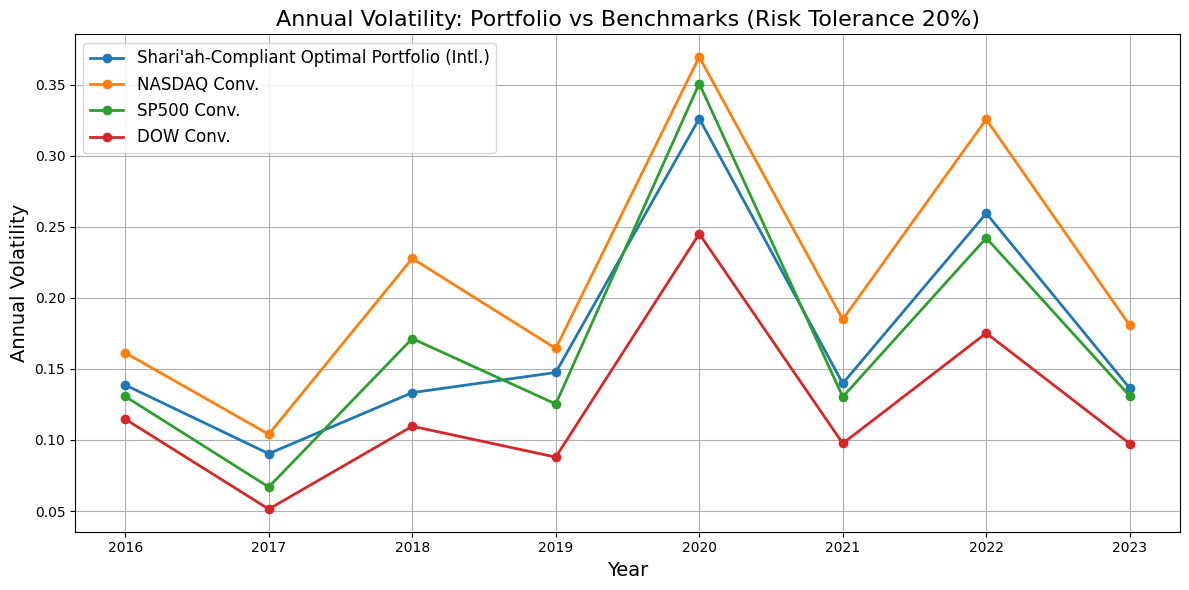

In [44]:
overall_optimal_portfolio_df.to_csv("overall_optimal_portfolio_mvc.csv", index_label="Portfolio")

# Normalize weights for pie chart
normalized_weights = overall_optimal_weights / np.sum(overall_optimal_weights)

years = np.arange(2016, 2024)

portfolio_annual_vol = []
for year_index in range(len(years)):
    weighted_vol = sum(
        overall_optimal_weights[i] * annual_vol_data[islamic_indices[i]][year_index] for i in range(len(islamic_indices))
    )
    portfolio_annual_vol.append(weighted_vol)


ndx_vol = annual_vol_data["NDX (Conv.)"]
spx_vol = annual_vol_data["SPX (Conv.)"]
w1dow_vol = annual_vol_data["W1DOW (Conv.)"]

# Plotting the performance over time
plt.figure(figsize=(12, 6))

plt.plot(years, portfolio_annual_vol, label="Shari'ah-Compliant Optimal Portfolio (Intl.)", marker="o", linewidth=2)

plt.plot(years, ndx_vol, label="NASDAQ Conv.", marker="o", linewidth=2)
plt.plot(years, spx_vol, label="SP500 Conv.", marker="o", linewidth=2)
plt.plot(years, w1dow_vol, label="DOW Conv.", marker="o", linewidth=2)

# Customize the plot
plt.title("Annual Volatility: Portfolio vs Benchmarks (Risk Tolerance 20%)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual Volatility", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [48]:
annual_cvar = {
 'BDDSESD': [-0.011015783463077947,  -0.019077490405216276,  -0.015390212660872342,  -0.02607519729330544,  -0.03844126679227555,  -0.018559935727274202,  -0.038427318066593476,  -0.018348139173753913],
 'DJIAP': [-0.022069545670314068,  -0.008391584012864618,  -0.02228661065626571,  -0.013960850967090726,  -0.027710782840621784,  -0.021334413090785282,  -0.026373865320180063,  -0.015993036781201238],
 'DJICHK': [-0.024233751584493583,  -0.0141061671441998,  -0.026760684241930635,  -0.021242087076636704,  -0.04188109663914921,  -0.04264259466718505,  -0.05215452551278687,  -0.03212052698441921],
 'DJIMID': [-0.017848926461560742,  -0.0077934304561041445,  -0.021431256542833878,  -0.01657194842440241,  -0.04475702805145595,  -0.017525516894779266,  -0.030790429539090777,  -0.014688000256035724],
 'DSES': [-0.008765002954733758,  -0.009368364410850085,  -0.012712269995979356,  -0.015878113112141018,  -0.03151803524331072,  -0.018049832394562645,  -0.01695239711785901,  -0.005835068997288817],
 'DWDEURS': [-0.027724907760220092,  -0.010748120281788372,  -0.02025715527556499,  -0.017181922616874908,  -0.04561056989379923,  -0.019583117638875682,  -0.035265833044925254,  -0.02137629114458715],
 'GS100': [-0.027844230084068947,  -0.011057481645769661,  -0.02350713862257801,  -0.014782358975253049,  -0.030576842021747024,  -0.02435005370897157,  -0.02792561716748162,  -0.01858259433321334],
 'IMUS': [-0.020464728098673092,  -0.01028690783857102,  -0.028413002453677248,  -0.02105926484486491,  -0.05509672824132366,  -0.02113227369543503,  -0.03748667811582054,  -0.016916714318830982],
 'IMXLD': [-0.0171133382937043,  -0.008369493087102237,  -0.022698462103057943,  -0.016578801587085894,  -0.042639017659664,  -0.015978766471996853,  -0.030467541665330708,  -0.014693908683777466],
 'JKIID': [-0.023374412290117608,  -0.013780341030211474,  -0.029828018026320652,  -0.02122912637500781,  -0.05170863457514112,  -0.022477206603183923,  -0.018984215493369032,  -0.01808820765949326],
 'JPNU': [-0.02912874619823117,  -0.01134822770369869,  -0.024620331044670027,  -0.014102271395768426,  -0.029026381541418643,  -0.023887310407531552,  -0.028230002739854473,  -0.01882636357675912],
 'NDX (Conv.)': [-0.025222088919133082,  -0.0161398469744187,  -0.034626871175541356,  -0.024414439143015707,  -0.05589238254549408,  -0.026912549187111928,  -0.043165255360369935,  -0.02050580020789607],
 'SHX': [-0.019878652222250978,  -0.00980224154065414,  -0.028507322912288278,  -0.020843443036203873,  -0.05559985688302505,  -0.019932224225847967,  -0.03646868663801073,  -0.01652465033652821],
 'SPX (Conv.)': [-0.019709231651556587,  -0.009615109845627617,  -0.02749315281959401,  -0.019588404910887775,  -0.05540419235465825,  -0.01860551559846583,  -0.0334684508746704,  -0.015686913534689487],
 'SWDPACXJ': [-0.0247682097625875,  -0.01410082964438082,  -0.02254304661994093,  -0.018465290283812993,  -0.04509508547540053,  -0.023431232174010937,  -0.03157591459672196,  -0.020570837976157115],
 'SWDPAC': [-0.02875601025257058,  -0.010746708594269943,  -0.024053405090553256,  -0.01644136504707021,  -0.030875851814608467,  -0.02247538667483314,  -0.031204610585519273,  -0.018792539718440235],
 'SWDXUS': [-0.022350476345238072,  -0.008142885649818705,  -0.018882198571479096,  -0.012984424081829453,  -0.03663247441765272,  -0.01858486036315549,  -0.029889387064633288,  -0.01691004803121585],
 'SWPXJAN': [-0.024126437518517754,  -0.013357022793027409,  -0.024041200318761318,  -0.01873881880848057,  -0.038502059007170866,  -0.020518436854002366,  -0.025587332779472807,  -0.015439902764617161],
 'W1DOW (Conv.)': [-0.018361657622350765,  -0.006268964437891898,  -0.018262383024286254,  -0.013362957321285375,  -0.041839600126874016,  -0.01509839040501404,  -0.024968548281068537,  -0.012816702731422193],
 'WALLE': [-0.022589281517318656,  -0.012195516559790513,   -0.021311371525478164,  -0.014990138474881561,  -0.03881175994609173,  -0.01887770909211535,  -0.026446997966173003,  -0.012908301839377643],
 'WORLDS': [-0.018413837123206205,  -0.007017891878892431,  -0.01854879776867552,  -0.015216599575659599,  -0.04397261284843558,  -0.017019499850389027,  -0.02613507597804537,  -0.013334949010582528]
}

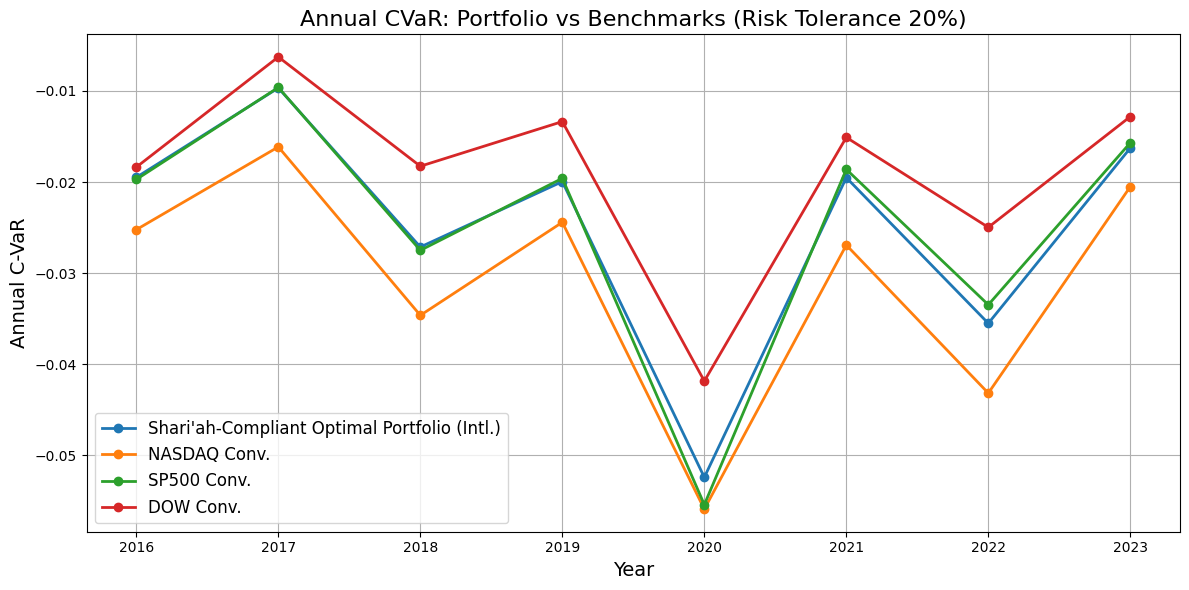

In [50]:
overall_optimal_portfolio_df.to_csv("overall_optimal_portfolio_mvc.csv", index_label="Portfolio")
years = np.arange(2016, 2024)

portfolio_annual_vol = []
for year_index in range(len(years)):
    weighted_vol = sum(
        overall_optimal_weights[i] * annual_cvar[islamic_indices[i]][year_index] for i in range(len(islamic_indices))
    )
    portfolio_annual_vol.append(weighted_vol)


ndx_vol = annual_cvar["NDX (Conv.)"]
spx_vol = annual_cvar["SPX (Conv.)"]
w1dow_vol = annual_cvar["W1DOW (Conv.)"]

# Plotting the performance over time
plt.figure(figsize=(12, 6))

plt.plot(years, portfolio_annual_vol, label="Shari'ah-Compliant Optimal Portfolio (Intl.)", marker="o", linewidth=2)

plt.plot(years, ndx_vol, label="NASDAQ Conv.", marker="o", linewidth=2)
plt.plot(years, spx_vol, label="SP500 Conv.", marker="o", linewidth=2)
plt.plot(years, w1dow_vol, label="DOW Conv.", marker="o", linewidth=2)

# Customize the plot
plt.title("Annual CVaR: Portfolio vs Benchmarks (Risk Tolerance 20%)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annual C-VaR", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()